In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1 - Comparing the Different Data Reuploading techniques in CartPoleV0 with optimal hyperparameters and non-optimal hyperparameters

Important Notation:
- In the Data Reuploading type, V0 means that no data reuploading was used, v1 means that it was similar to the one used in "Uncovering Instabilities" and v2 means that it was similar to the one used by Skolik.

Specifications:
 - 1) Input Scaling: Models with Data Re-uploading type v1 and v2 had input scaling. These inputs were initialized as 1.
 - 2) Output Scaling: All of the models used local scaling in the output, and the weights were also initialized as 1. Besides, the expectation values were normalized to be between 0 and 1, as done in Skolik's paper.
 - 3) Every parametrized rotation's parameter was initialized between o and pi.
 - 4) The optimal and non-optimal Hyperparameters are the same as the ones in Skolik's paper.
 - 5) The state's featuresare feeded directly to the VQC. There is no feature manipulation.
 - 6) Each Model was trained 4 times, and a model could finish early if it achieved an average return of the last 10 episodes over 196.

In [2]:
#Load the data from the pickle files with optimal hyperparameters

v0_skolik_optimal_hyper = []
v1_skolik_optimal_hyper = []
v2_skolik_optimal_hyper = []

path = "Results/nothing/skolik_arch/schuld_datareup/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper/agent1.pkl"

#Load the data corresponding to the V2 models
for i in range(1,5):
    with(open(f"Results/nothing/skolik_arch/schuld_datareup/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper/agent{i}.pkl", "rb")) as f:
        v2_skolik_optimal_hyper.append(pickle.load(f))

#Load the data corresponding to the V0 models
for i in range(1,5):
    with(open(f"Results/nothing/skolik_arch/baseline/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper/agent{i}.pkl", "rb")) as f:
        v0_skolik_optimal_hyper.append(pickle.load(f))

#Load the data corresponding to the V1 models
for i in range(1,5):
    with(open(f"Results/nothing/skolik_arch/basic_datareup/localskolik_outscaling/ZZ_obs/skolik_optimal_hyper/agent{i}.pkl", "rb")) as f:
        v1_skolik_optimal_hyper.append(pickle.load(f))

In [4]:
#Load the data from the pickle files with non-optimal hyperparameters

v0_skolik_non_optimal_hyper = []
v1_skolik_non_optimal_hyper = []
v2_skolik_non_optimal_hyper = []

#Load the data corresponding to the V2 models
for i in range(1,5):
    with(open(f"Results/nothing/skolik_arch/schuld_datareup/localskolik_outscaling/ZZ_obs/skolik_nonoptimal_hyper/agent{i}.pkl", "rb")) as f:
        v2_skolik_non_optimal_hyper.append(pickle.load(f))
    
#Load the data corresponding to the V0 models
for i in range(1,3):
    with(open(f"Results/nothing/skolik_arch/baseline/localskolik_outscaling/ZZ_obs/skolik_nonoptimal_hyper/agent{i}.pkl", "rb")) as f:
        v0_skolik_non_optimal_hyper.append(pickle.load(f))

#Load the data corresponding to the V1 models
for i in range(1,5):
    with(open(f"Results/nothing/skolik_arch/basic_datareup/localskolik_outscaling/ZZ_obs/skolik_nonoptimal_hyper/agent{i}.pkl", "rb")) as f:
        v1_skolik_non_optimal_hyper.append(pickle.load(f))

I lost two of the V0 agents with non-optimal hyperparameters

In [5]:
#Now each list contains 4 agents from the same model
print("Number of agents with V0 model",len(v0_skolik_optimal_hyper))
print("Number of agents with V2 model",len(v2_skolik_optimal_hyper))
print("Number of agents with V1 model",len(v1_skolik_optimal_hyper))

Number of agents with V0 model 4
Number of agents with V2 model 4
Number of agents with V1 model 4


In [6]:
v0_skolik_optimal_hyper[0].keys()

dict_keys(['episode_reward_history', 'gradients', 'loss_array', 'q_values_array', 'weights'])

## 1.1) Analysis of the performance of each model in the environment using a moving average

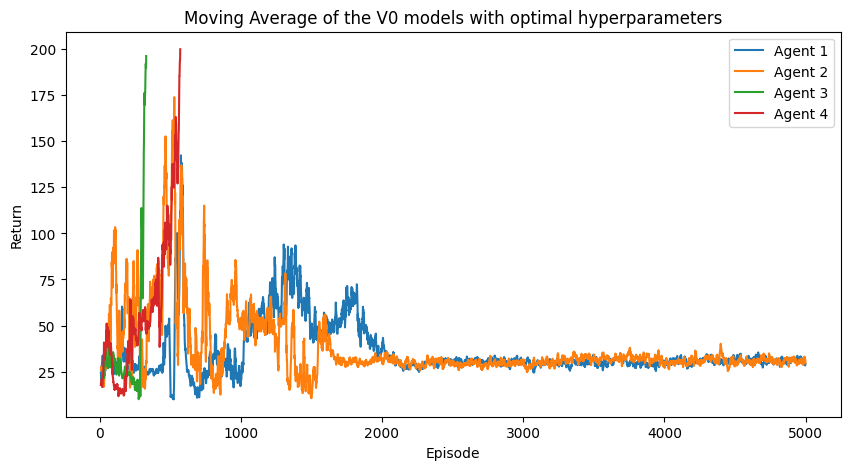

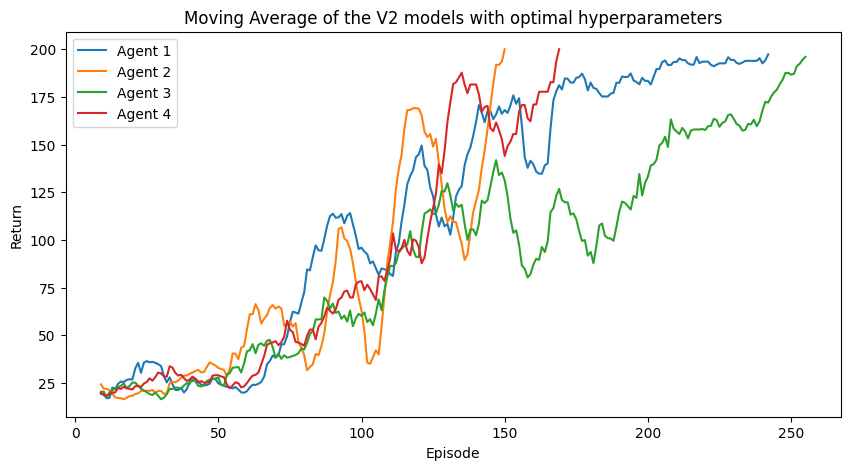

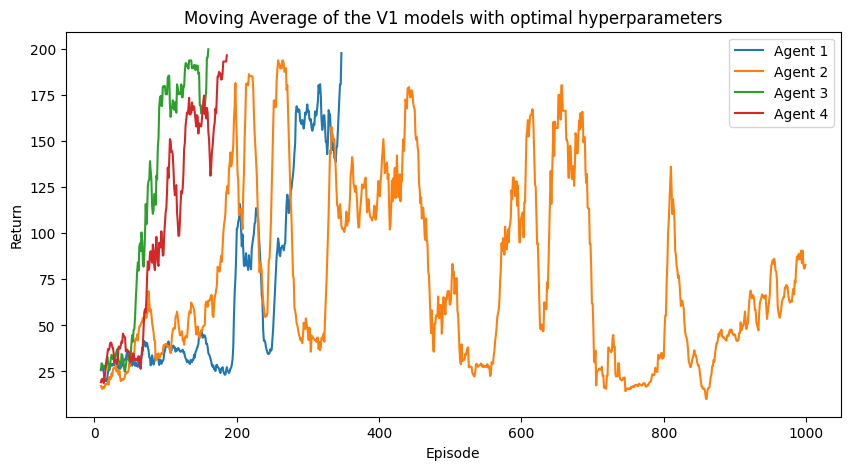

IndexError: list index out of range

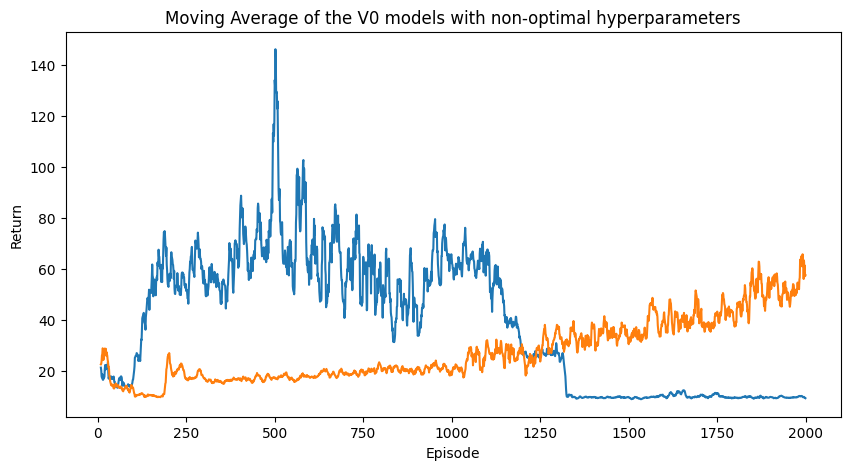

In [7]:
#Plot the moving average of the rewards for each agent
plt.figure(figsize=(10, 5))
plt.title("Moving Average of the V0 models with optimal hyperparameters")
plt.xlabel("Episode")
plt.ylabel("Return")

for i in range(4):
    plt.plot(pd.Series(v0_skolik_optimal_hyper[i]["episode_reward_history"]).rolling(10).mean(), label = f"Agent {i+1}")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Moving Average of the V2 models with optimal hyperparameters")
plt.xlabel("Episode")
plt.ylabel("Return")

for i in range(4):
    plt.plot(pd.Series(v2_skolik_optimal_hyper[i]["episode_reward_history"]).rolling(10).mean(), label = f"Agent {i+1}")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Moving Average of the V1 models with optimal hyperparameters")
plt.xlabel("Episode")
plt.ylabel("Return")

for i in range(4):
    plt.plot(pd.Series(v1_skolik_optimal_hyper[i]["episode_reward_history"]).rolling(10).mean(), label = f"Agent {i+1}")
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.title("Moving Average of the V0 models with non-optimal hyperparameters")
plt.xlabel("Episode")
plt.ylabel("Return")

for i in range(4):
    plt.plot(pd.Series(v0_skolik_non_optimal_hyper[i]["episode_reward_history"]).rolling(10).mean(), label = f"Agent {i+1}")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Moving Average of the V2 models with non-optimal hyperparameters")
plt.xlabel("Episode")
plt.ylabel("Return")

for i in range(4):
    plt.plot(pd.Series(v2_skolik_non_optimal_hyper[i]["episode_reward_history"]).rolling(10).mean(), label = f"Agent {i+1}")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Moving Average of the V1 models with non-optimal hyperparameters")
plt.xlabel("Episode")
plt.ylabel("Return")

for i in range(4):
    plt.plot(pd.Series(v1_skolik_non_optimal_hyper[i]["episode_reward_history"]).rolling(10).mean(), label = f"Agent {i+1}")
plt.legend()
plt.show()


In this case, it makes no sense to analyze de average return of each of the models over all the agents trained using that model because we allowed the models to exit early, but it could be a relevant study in the future.

In [8]:
# Now let's get the gradients for the V0 and V2 models
v0_gradients = [v0_skolik_optimal_hyper[i]["gradients"] for i in range(4)]
v1_gradients = [v1_skolik_optimal_hyper[i]["gradients"] for i in range(4)]
v2_gradients = [v2_skolik_optimal_hyper[i]["gradients"] for i in range(4)]


#v0_gradients_non_optimal = [v0_skolik_non_optimal_hyper[i]["gradients"] for i in range(4)]
v1_gradients_non_optimal = [v1_skolik_non_optimal_hyper[i]["gradients"] for i in range(4)]
v2_gradients_non_optimal = [v2_skolik_non_optimal_hyper[i]["gradients"] for i in range(4)]

In [9]:

v0_gradients_output = []
v1_gradients_output = []
v2_gradients_output = []
v0_aux = []
v1_aux = []
v2_aux = []

for i in range(4):
    for j in range(len(v0_gradients[i])):
        v0_aux.append(v0_gradients[i][j][1][0][0])
    v0_gradients_output.append(v0_aux)
    v0_aux = []

for i in range(4):
    for j in range(len(v2_gradients[i])):
        v2_aux.append(v2_gradients[i][j][2][0][0])
    v2_gradients_output.append(v2_aux)
    v2_aux = []

for i in range(4):
    for j in range(len(v1_gradients[i])):
        v1_aux.append(v1_gradients[i][j][2][0][0])
    v1_gradients_output.append(v1_aux)
    v1_aux = []

## 1.2) Analysis of the gradients of the output weights for each model

In [10]:
# Now let's take each list and calculate the mean andthe variance of the gradients at every training step

v0_gradients_first_parameter_counts = [len(v0_gradients_output[i]) for i in range(4)]
v0_gradients_first_parameter_min = min(v0_gradients_first_parameter_counts)

v0_gradients_first_parameter_mean = []
v0_gradients_first_parameter_std = []
aux_mean = []

for i in range(v0_gradients_first_parameter_min):
    for j in range(4):
        aux_mean.append(v0_gradients_output[j][i])
    v0_gradients_first_parameter_mean.append(np.mean(aux_mean))
    v0_gradients_first_parameter_std.append(np.std(aux_mean))
    aux_mean = []

v2_gradients_first_parameter_counts = [len(v2_gradients_output[i]) for i in range(4)]
v2_gradients_first_parameter_min = min(v2_gradients_first_parameter_counts)

v2_gradients_first_parameter_mean = []
v2_gradients_first_parameter_std = []
aux_mean = []

for i in range(v2_gradients_first_parameter_min):
    for j in range(4):
        aux_mean.append(v2_gradients_output[j][i])
    v2_gradients_first_parameter_mean.append(np.mean(aux_mean))
    v2_gradients_first_parameter_std.append(np.std(aux_mean))
    aux_mean = []

v1_gradients_first_parameter_counts = [len(v1_gradients_output[i]) for i in range(4)]
v1_gradients_first_parameter_min = min(v1_gradients_first_parameter_counts)

v1_gradients_first_parameter_mean = []
v1_gradients_first_parameter_std = []
aux_mean = []

for i in range(v1_gradients_first_parameter_min):
    for j in range(4):
        aux_mean.append(v1_gradients_output[j][i])
    v1_gradients_first_parameter_mean.append(np.mean(aux_mean))
    v1_gradients_first_parameter_std.append(np.std(aux_mean))
    aux_mean = []
    


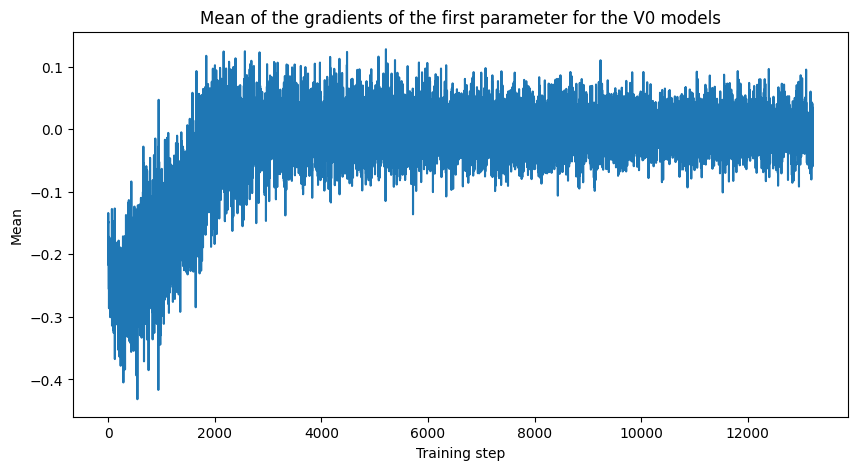

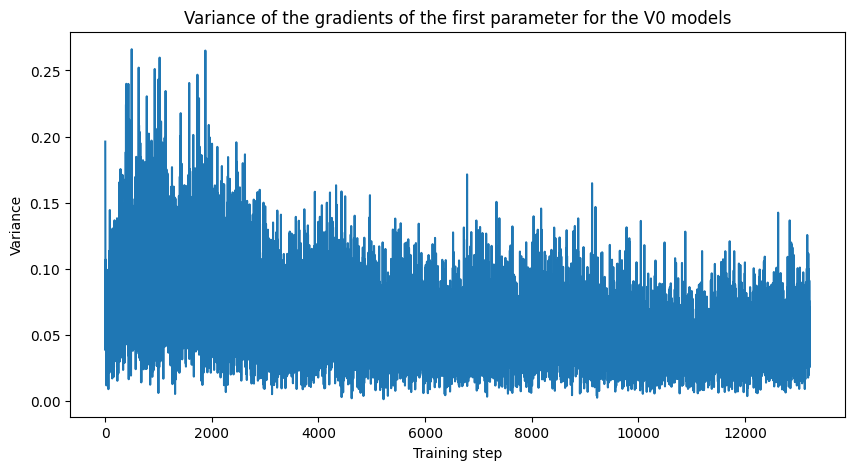

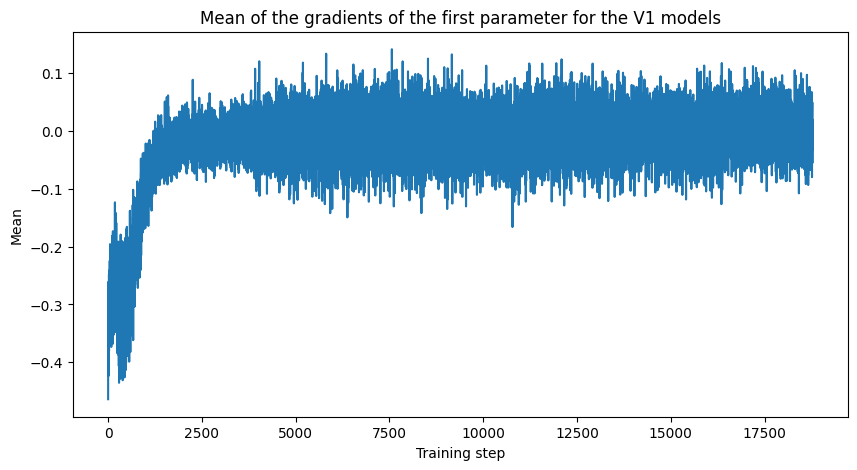

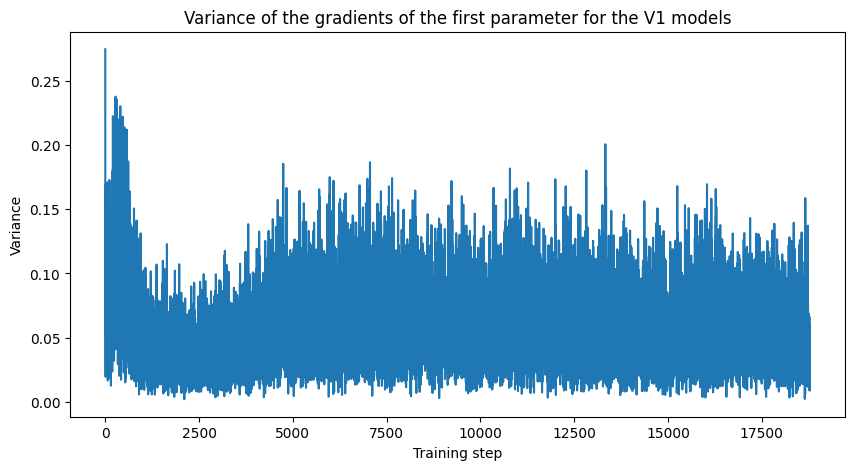

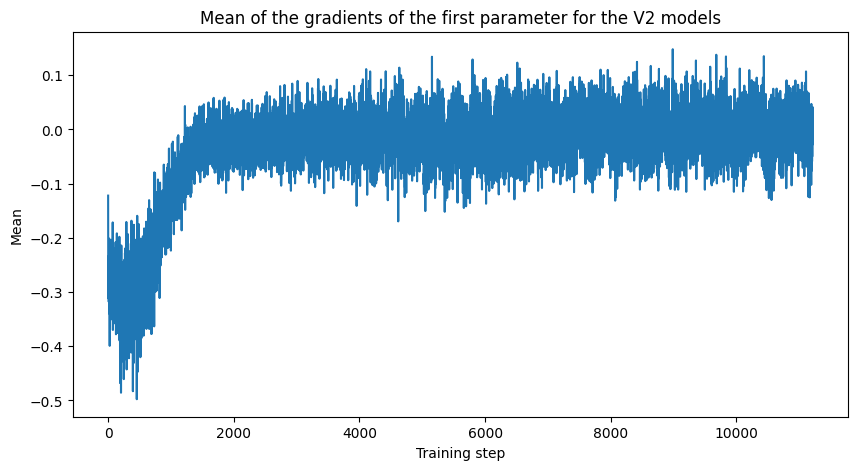

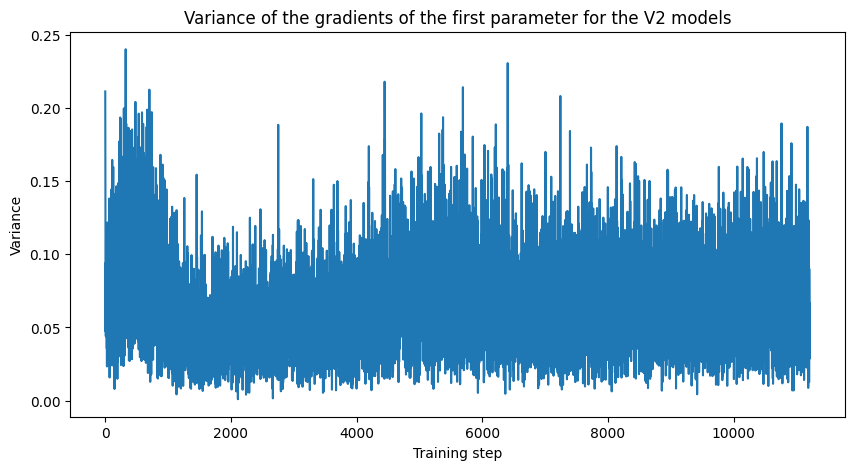

In [11]:
#Now let's plot the Variance and the mean of the gradients for the V0, V1 and V2 models

plt.figure(figsize=(10, 5))
plt.title("Mean of the gradients of the first parameter for the V0 models")
plt.xlabel("Training step")
plt.ylabel("Mean")
plt.plot(v0_gradients_first_parameter_mean)
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Variance of the gradients of the first parameter for the V0 models")
plt.xlabel("Training step")
plt.ylabel("Variance")
plt.plot(v0_gradients_first_parameter_std)
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Mean of the gradients of the first parameter for the V1 models")
plt.xlabel("Training step")
plt.ylabel("Mean")
plt.plot(v1_gradients_first_parameter_mean)
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Variance of the gradients of the first parameter for the V1 models")
plt.xlabel("Training step")
plt.ylabel("Variance")
plt.plot(v1_gradients_first_parameter_std)
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Mean of the gradients of the first parameter for the V2 models")
plt.xlabel("Training step")
plt.ylabel("Mean")
plt.plot(v2_gradients_first_parameter_mean)
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Variance of the gradients of the first parameter for the V2 models")
plt.xlabel("Training step")
plt.ylabel("Variance")
plt.plot(v2_gradients_first_parameter_std)
plt.show()


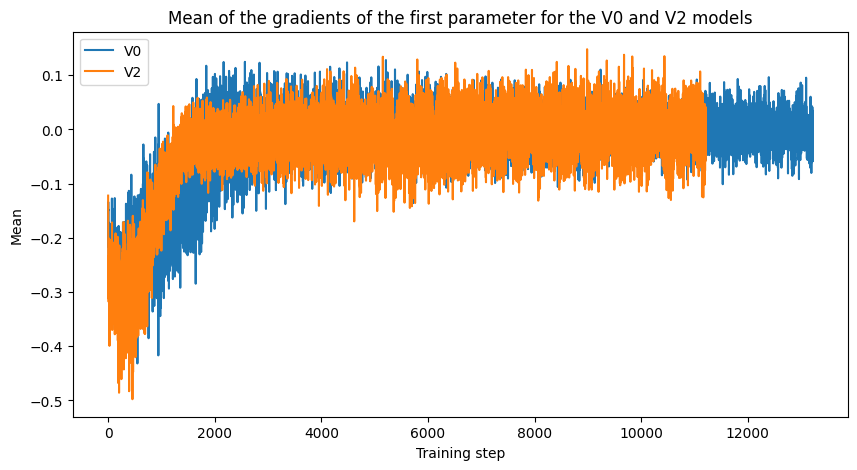

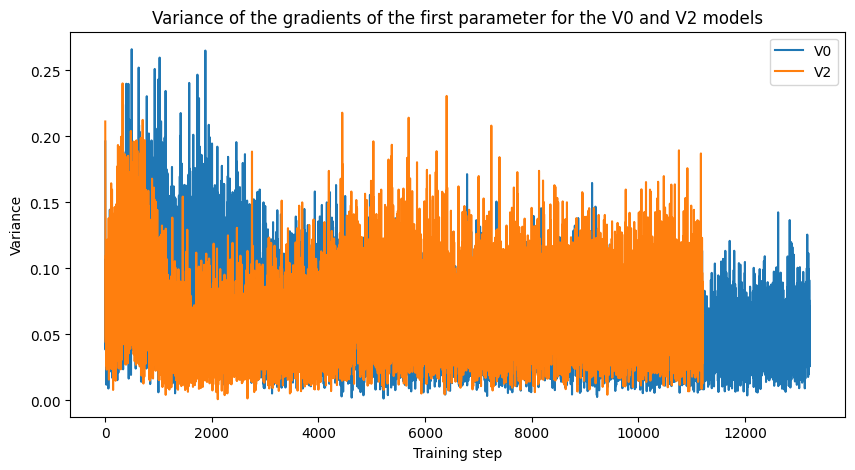

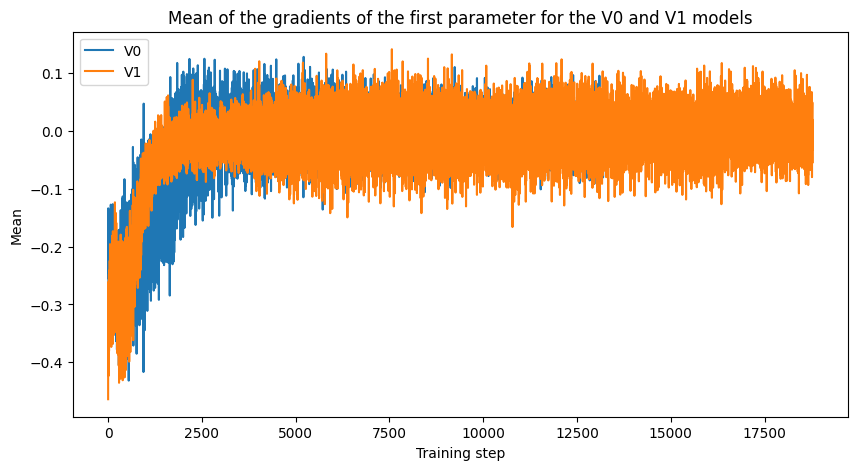

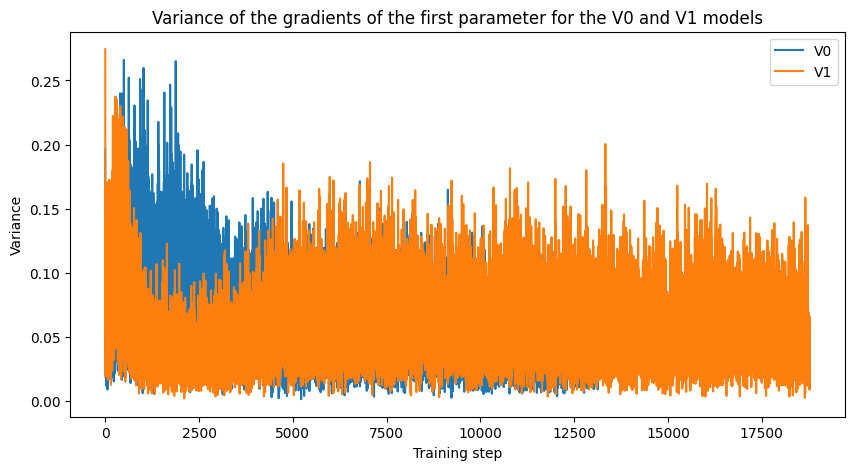

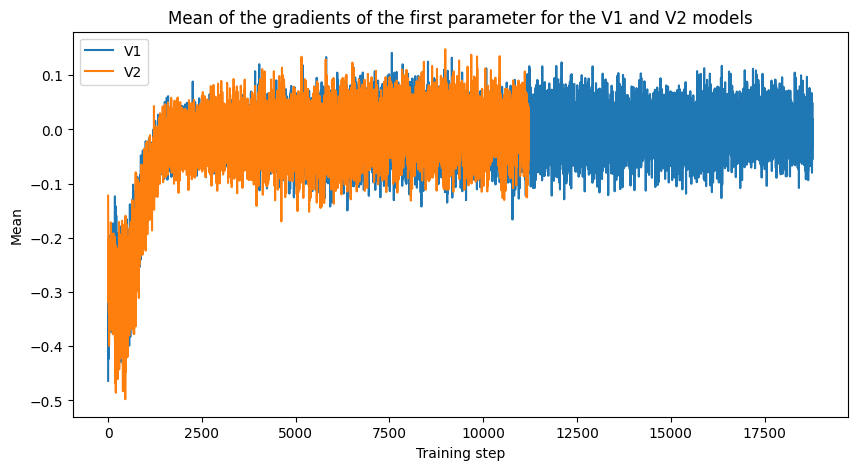

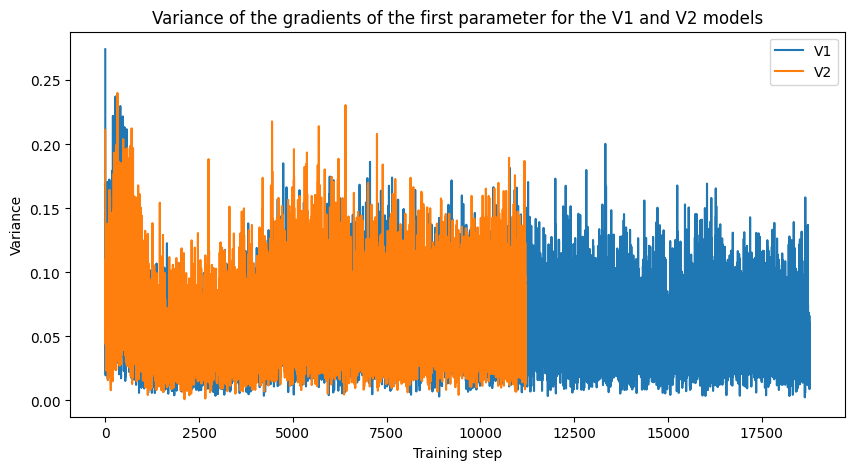

In [12]:
#Now let's plot the mean and variance of the gradients for the V0, V1 and V2 models in the same plot

plt.figure(figsize=(10, 5))
plt.title("Mean of the gradients of the first parameter for the V0 and V2 models")
plt.xlabel("Training step")
plt.ylabel("Mean")
plt.plot(v0_gradients_first_parameter_mean, label = "V0")
plt.plot(v2_gradients_first_parameter_mean, label = "V2")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Variance of the gradients of the first parameter for the V0 and V2 models")
plt.xlabel("Training step")
plt.ylabel("Variance")
plt.plot(v0_gradients_first_parameter_std, label = "V0")
plt.plot(v2_gradients_first_parameter_std, label = "V2")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Mean of the gradients of the first parameter for the V0 and V1 models")
plt.xlabel("Training step")
plt.ylabel("Mean")
plt.plot(v0_gradients_first_parameter_mean, label = "V0")
plt.plot(v1_gradients_first_parameter_mean, label = "V1")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Variance of the gradients of the first parameter for the V0 and V1 models")
plt.xlabel("Training step")
plt.ylabel("Variance")
plt.plot(v0_gradients_first_parameter_std, label = "V0")
plt.plot(v1_gradients_first_parameter_std, label = "V1")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Mean of the gradients of the first parameter for the V1 and V2 models")
plt.xlabel("Training step")
plt.ylabel("Mean")
plt.plot(v1_gradients_first_parameter_mean, label = "V1")
plt.plot(v2_gradients_first_parameter_mean, label = "V2")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Variance of the gradients of the first parameter for the V1 and V2 models")
plt.xlabel("Training step")
plt.ylabel("Variance")
plt.plot(v1_gradients_first_parameter_std, label = "V1")
plt.plot(v2_gradients_first_parameter_std, label = "V2")
plt.legend()
plt.show()



## 1.3) Analysis of the gradient of the first parametrized rotation for all models

In [13]:
"""
Let's build 3 lists, one for the V2 models, one for the V1 models and one for the V0 models. Each list will have 4 lists that will contain the 
gradients of the first parametrized rotation over all the training steps.
"""

v0_gradients_first_parameter = []
v1_gradients_first_parameter = []
v2_gradients_first_parameter = []
v0_aux = []
v1_aux = []
v2_aux = []

for i in range(4):
    for j in range(len(v0_gradients[i])):
        v0_aux.append(abs(v0_gradients[i][j][0][0][0]))
    v0_gradients_first_parameter.append(v0_aux)
    v0_aux = []

for i in range(4):
    for j in range(len(v2_gradients[i])):
        v2_aux.append(abs(v2_gradients[i][j][0][0][0]))
    v2_gradients_first_parameter.append(v2_aux)
    v2_aux = []

for i in range(4):
    for j in range(len(v1_gradients[i])):
        v1_aux.append(abs(v1_gradients[i][j][0][0][0]))
    v1_gradients_first_parameter.append(v1_aux)
    v1_aux = []


v0_gradients_first_parameter_non_optimal = []
v1_gradients_first_parameter_non_optimal = []
v2_gradients_first_parameter_non_optimal = []
v0_aux = []
v1_aux = []
v2_aux = []

for i in range(4):
    for j in range(len(v2_gradients_non_optimal[i])):
        v2_aux.append(v2_gradients_non_optimal[i][j][0][0][0])
    v2_gradients_first_parameter_non_optimal.append(v2_aux)
    v2_aux = []

for i in range(4):
    for j in range(len(v1_gradients_non_optimal[i])):
        v1_aux.append(v1_gradients_non_optimal[i][j][0][0][0])
    v1_gradients_first_parameter_non_optimal.append(v1_aux)
    v1_aux = []


In [14]:
# Now let's take each list and calculate the mean andthe variance of the gradients at every training step

v0_gradients_first_parameter_counts = [len(v0_gradients_first_parameter[i]) for i in range(4)]
v0_gradients_first_parameter_min = min(v0_gradients_first_parameter_counts)

v0_gradients_first_parameter_mean = []
v0_gradients_first_parameter_std = []
aux_mean = []

for i in range(v0_gradients_first_parameter_min):
    for j in range(4):
        aux_mean.append(v0_gradients_first_parameter[j][i])
    v0_gradients_first_parameter_mean.append(np.mean(aux_mean))
    v0_gradients_first_parameter_std.append(np.std(aux_mean))
    aux_mean = []

v2_gradients_first_parameter_counts = [len(v2_gradients_first_parameter[i]) for i in range(4)]
v2_gradients_first_parameter_min = min(v2_gradients_first_parameter_counts)

v2_gradients_first_parameter_mean = []
v2_gradients_first_parameter_std = []
aux_mean = []

for i in range(v2_gradients_first_parameter_min):
    for j in range(4):
        aux_mean.append(v2_gradients_first_parameter[j][i])
    v2_gradients_first_parameter_mean.append(np.mean(aux_mean))
    v2_gradients_first_parameter_std.append(np.std(aux_mean))
    aux_mean = []

v1_gradients_first_parameter_counts = [len(v1_gradients_first_parameter[i]) for i in range(4)]
v1_gradients_first_parameter_min = min(v1_gradients_first_parameter_counts)

v1_gradients_first_parameter_mean = []
v1_gradients_first_parameter_std = []
aux_mean = []

for i in range(v1_gradients_first_parameter_min):
    for j in range(4):
        aux_mean.append(v1_gradients_first_parameter[j][i])
    v1_gradients_first_parameter_mean.append(np.mean(aux_mean))
    v1_gradients_first_parameter_std.append(np.std(aux_mean))
    aux_mean = []
    

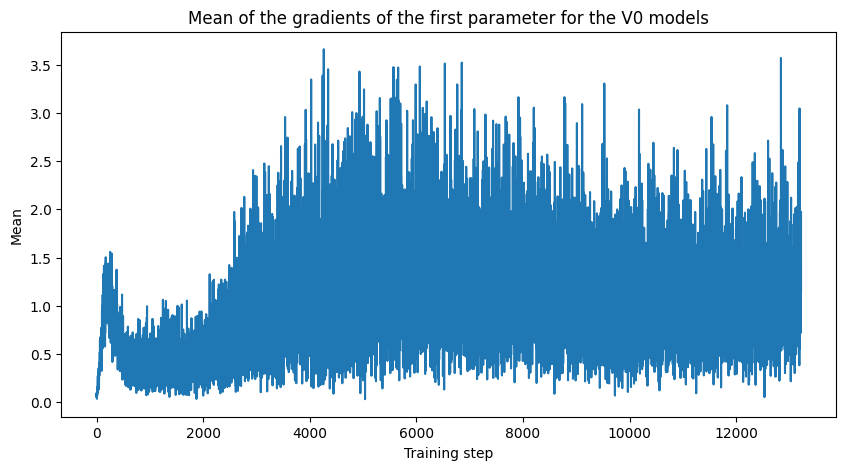

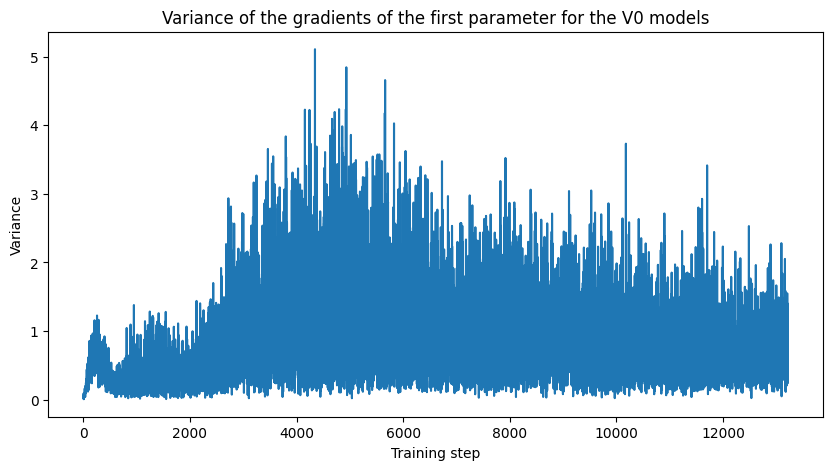

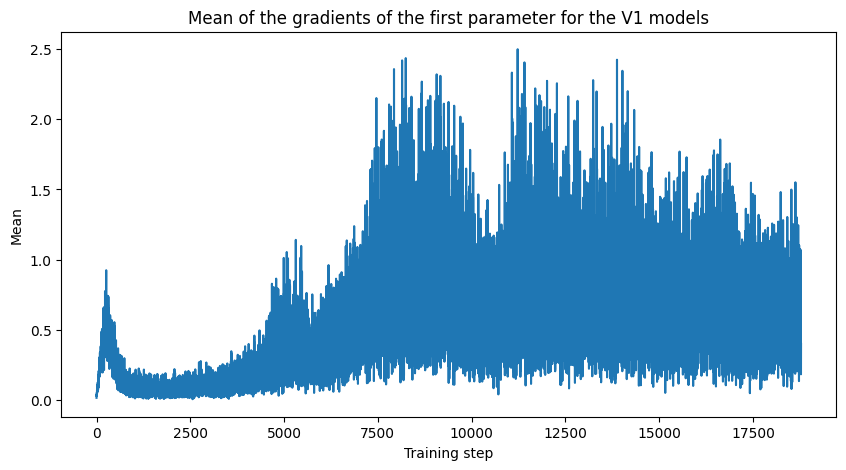

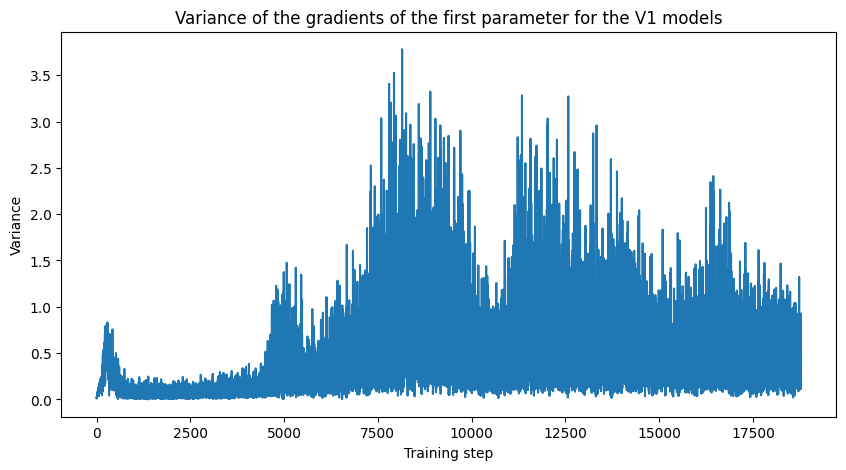

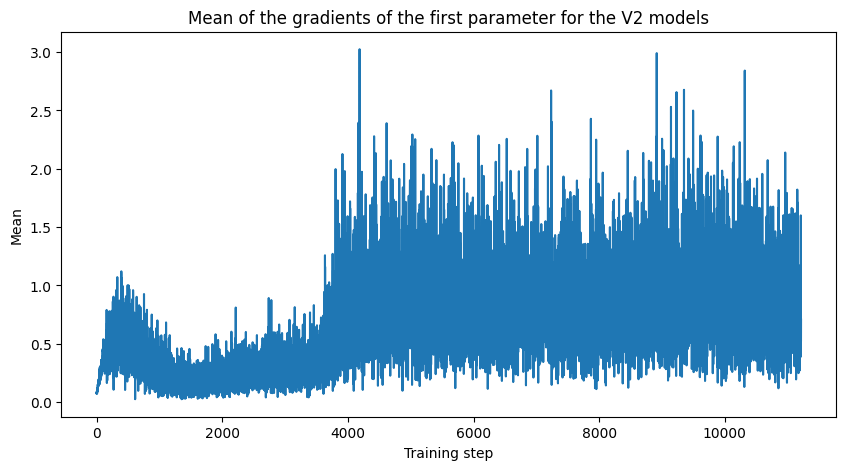

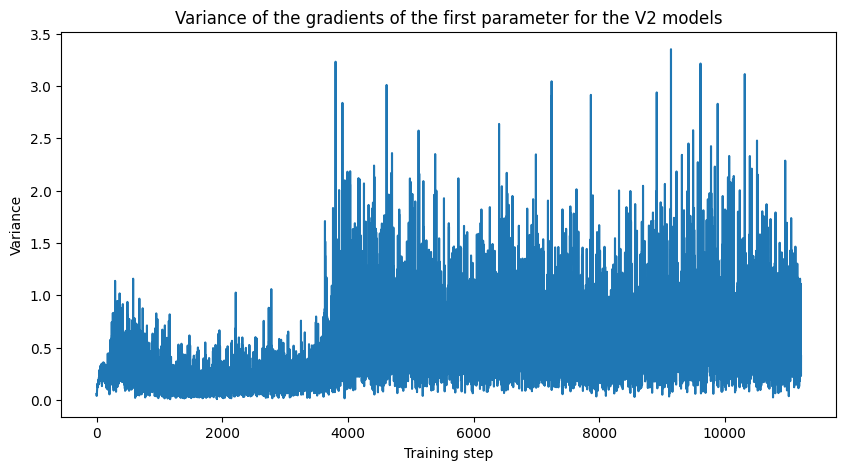

In [15]:
#Now let's plot the Variance and the mean of the gradients for the V0, V1 and V2 models

plt.figure(figsize=(10, 5))
plt.title("Mean of the gradients of the first parameter for the V0 models")
plt.xlabel("Training step")
plt.ylabel("Mean")
plt.plot(v0_gradients_first_parameter_mean)
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Variance of the gradients of the first parameter for the V0 models")
plt.xlabel("Training step")
plt.ylabel("Variance")
plt.plot(v0_gradients_first_parameter_std)
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Mean of the gradients of the first parameter for the V1 models")
plt.xlabel("Training step")
plt.ylabel("Mean")
plt.plot(v1_gradients_first_parameter_mean)
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Variance of the gradients of the first parameter for the V1 models")
plt.xlabel("Training step")
plt.ylabel("Variance")
plt.plot(v1_gradients_first_parameter_std)
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Mean of the gradients of the first parameter for the V2 models")
plt.xlabel("Training step")
plt.ylabel("Mean")
plt.plot(v2_gradients_first_parameter_mean)
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Variance of the gradients of the first parameter for the V2 models")
plt.xlabel("Training step")
plt.ylabel("Variance")
plt.plot(v2_gradients_first_parameter_std)
plt.show()


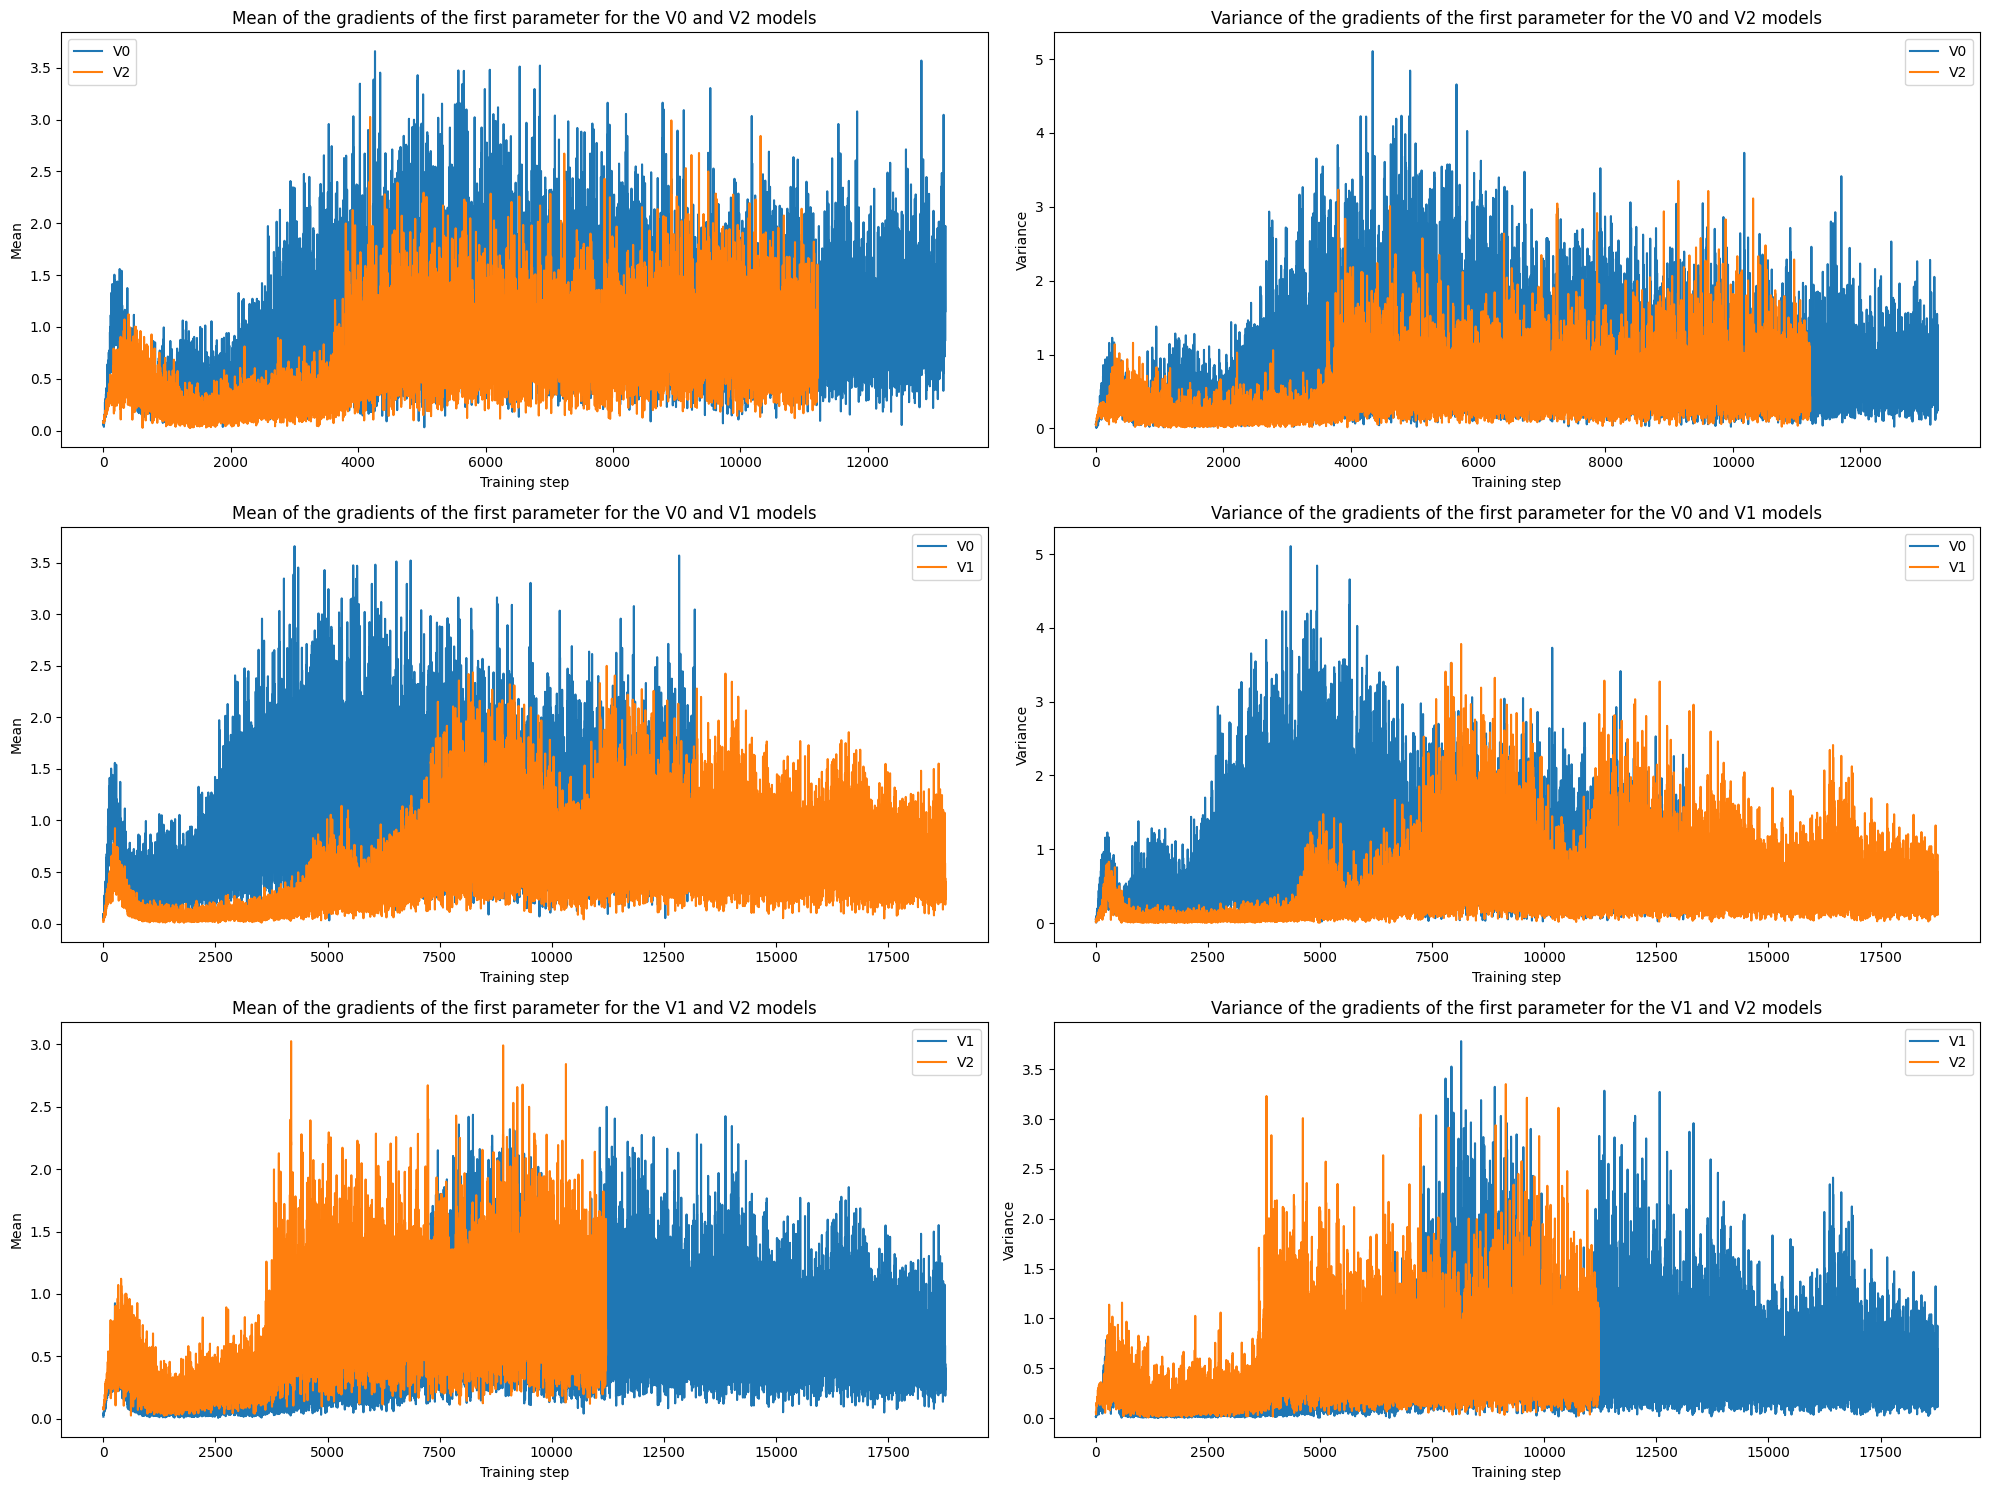

In [17]:
#Now let's plot the mean and variance of the gradients for the V0, V1 and V2 models in the same plot

fig, axs = plt.subplots(3, 2, figsize=(20, 15), tight_layout=True)

axs[0,0].plot(v0_gradients_first_parameter_mean, label = "V0")
axs[0,0].plot(v2_gradients_first_parameter_mean, label = "V2")
axs[0,0].set_title("Mean of the gradients of the first parameter for the V0 and V2 models")
axs[0,0].set_xlabel("Training step")
axs[0,0].set_ylabel("Mean")
axs[0,0].legend()

axs[0,1].plot(v0_gradients_first_parameter_std, label = "V0")
axs[0,1].plot(v2_gradients_first_parameter_std, label = "V2")
axs[0,1].set_title("Variance of the gradients of the first parameter for the V0 and V2 models")
axs[0,1].set_xlabel("Training step")
axs[0,1].set_ylabel("Variance")
axs[0,1].legend()

axs[1,0].plot(v0_gradients_first_parameter_mean, label = "V0")
axs[1,0].plot(v1_gradients_first_parameter_mean, label = "V1")
axs[1,0].set_title("Mean of the gradients of the first parameter for the V0 and V1 models")
axs[1,0].set_xlabel("Training step")
axs[1,0].set_ylabel("Mean")
axs[1,0].legend()

axs[1,1].plot(v0_gradients_first_parameter_std, label = "V0")
axs[1,1].plot(v1_gradients_first_parameter_std, label = "V1")
axs[1,1].set_title("Variance of the gradients of the first parameter for the V0 and V1 models")
axs[1,1].set_xlabel("Training step")
axs[1,1].set_ylabel("Variance")
axs[1,1].legend()

axs[2,0].plot(v1_gradients_first_parameter_mean, label = "V1")
axs[2,0].plot(v2_gradients_first_parameter_mean, label = "V2")
axs[2,0].set_title("Mean of the gradients of the first parameter for the V1 and V2 models")
axs[2,0].set_xlabel("Training step")
axs[2,0].set_ylabel("Mean")
axs[2,0].legend()

axs[2,1].plot(v1_gradients_first_parameter_std, label = "V1")
axs[2,1].plot(v2_gradients_first_parameter_std, label = "V2")
axs[2,1].set_title("Variance of the gradients of the first parameter for the V1 and V2 models")
axs[2,1].set_xlabel("Training step")
axs[2,1].set_ylabel("Variance")
axs[2,1].legend()

plt.show()



## 1.4) Analysis of the last parametrized rotation parameter for all models

I will only analyse the gradients from the models with the optymal hyperparameters.

In [18]:
# The first index is the agent
# The second index is the training step
# The third index is the type of gradient (parametrized, input (V1 and V2), output)
# The fourth index does nothing
# The fifth index is the parameter

v0_gradients[0][0][0][0]

array([-8.4644087e-02, -9.5592365e-03,  3.1814095e-02,  1.0651468e-02,
       -1.5873306e-03, -7.5284682e-02,  6.1979238e-02,  6.4232834e-02,
        5.6981321e-02,  6.9230278e-03,  8.2464322e-02, -1.2394481e-03,
       -4.0928192e-02, -1.3063133e-02, -8.7501563e-02,  3.4537487e-02,
       -3.8847722e-02,  6.4164229e-02, -8.6900741e-03, -3.0195264e-03,
        1.0777071e-01,  8.3429016e-02, -6.2927417e-02, -1.8381555e-01,
        5.4762248e-02,  6.4214692e-07,  5.2627176e-03,  1.1394732e-06,
        6.6131406e-02,  1.9519265e-01, -5.1114257e-02, -2.2646230e-01,
       -1.9557774e-07, -1.1358861e-06,  7.2177500e-07,  1.4911348e-07,
       -8.1644908e-02, -4.8615038e-07,  1.0057413e-01,  5.0949893e-07],
      dtype=float32)

In [19]:
"""
Let's build 3 lists, one for the V2 models, one for the V1 models and one for the V0 models. Each list will have 4 lists that will contain the 
gradients of the last parametrized rotation over all the training steps.
"""

v0_gradients_last_parameter = []
v1_gradients_last_parameter = []
v2_gradients_last_parameter = []
v0_aux = []
v1_aux = []
v2_aux = []

for i in range(4):
    for j in range(len(v0_gradients[i])):
        v0_aux.append(abs(v0_gradients[i][j][0][0][-1]))
    v0_gradients_last_parameter.append(v0_aux)
    v0_aux = []

for i in range(4):
    for j in range(len(v2_gradients[i])):
        v2_aux.append(abs(v2_gradients[i][j][0][0][-1]))
    v2_gradients_last_parameter.append(v2_aux)
    v2_aux = []

for i in range(4):
    for j in range(len(v1_gradients[i])):
        v1_aux.append(abs(v1_gradients[i][j][0][0][-1]))
    v1_gradients_last_parameter.append(v1_aux)
    v1_aux = []

In [20]:
# Now let's take each list and calculate the mean andthe variance of the gradients at every training step

v0_gradients_last_parameter_counts = [len(v0_gradients_last_parameter[i]) for i in range(4)]
v0_gradients_last_parameter_min = min(v0_gradients_last_parameter_counts)

v0_gradients_last_parameter_mean = []
v0_gradients_last_parameter_std = []
aux_mean = []

for i in range(v0_gradients_last_parameter_min):
    for j in range(4):
        aux_mean.append(v0_gradients_last_parameter[j][i])
    v0_gradients_last_parameter_mean.append(np.mean(aux_mean))
    v0_gradients_last_parameter_std.append(np.std(aux_mean))
    aux_mean = []

v2_gradients_last_parameter_counts = [len(v2_gradients_last_parameter[i]) for i in range(4)]
v2_gradients_last_parameter_min = min(v2_gradients_last_parameter_counts)

v2_gradients_last_parameter_mean = []
v2_gradients_last_parameter_std = []
aux_mean = []

for i in range(v2_gradients_last_parameter_min):
    for j in range(4):
        aux_mean.append(v2_gradients_last_parameter[j][i])
    v2_gradients_last_parameter_mean.append(np.mean(aux_mean))
    v2_gradients_last_parameter_std.append(np.std(aux_mean))
    aux_mean = []

v1_gradients_last_parameter_counts = [len(v1_gradients_last_parameter[i]) for i in range(4)]
v1_gradients_last_parameter_min = min(v1_gradients_last_parameter_counts)

v1_gradients_last_parameter_mean = []
v1_gradients_last_parameter_std = []
aux_mean = []

for i in range(v1_gradients_last_parameter_min):
    for j in range(4):
        aux_mean.append(v1_gradients_last_parameter[j][i])
    v1_gradients_last_parameter_mean.append(np.mean(aux_mean))
    v1_gradients_last_parameter_std.append(np.std(aux_mean))
    aux_mean = []
    


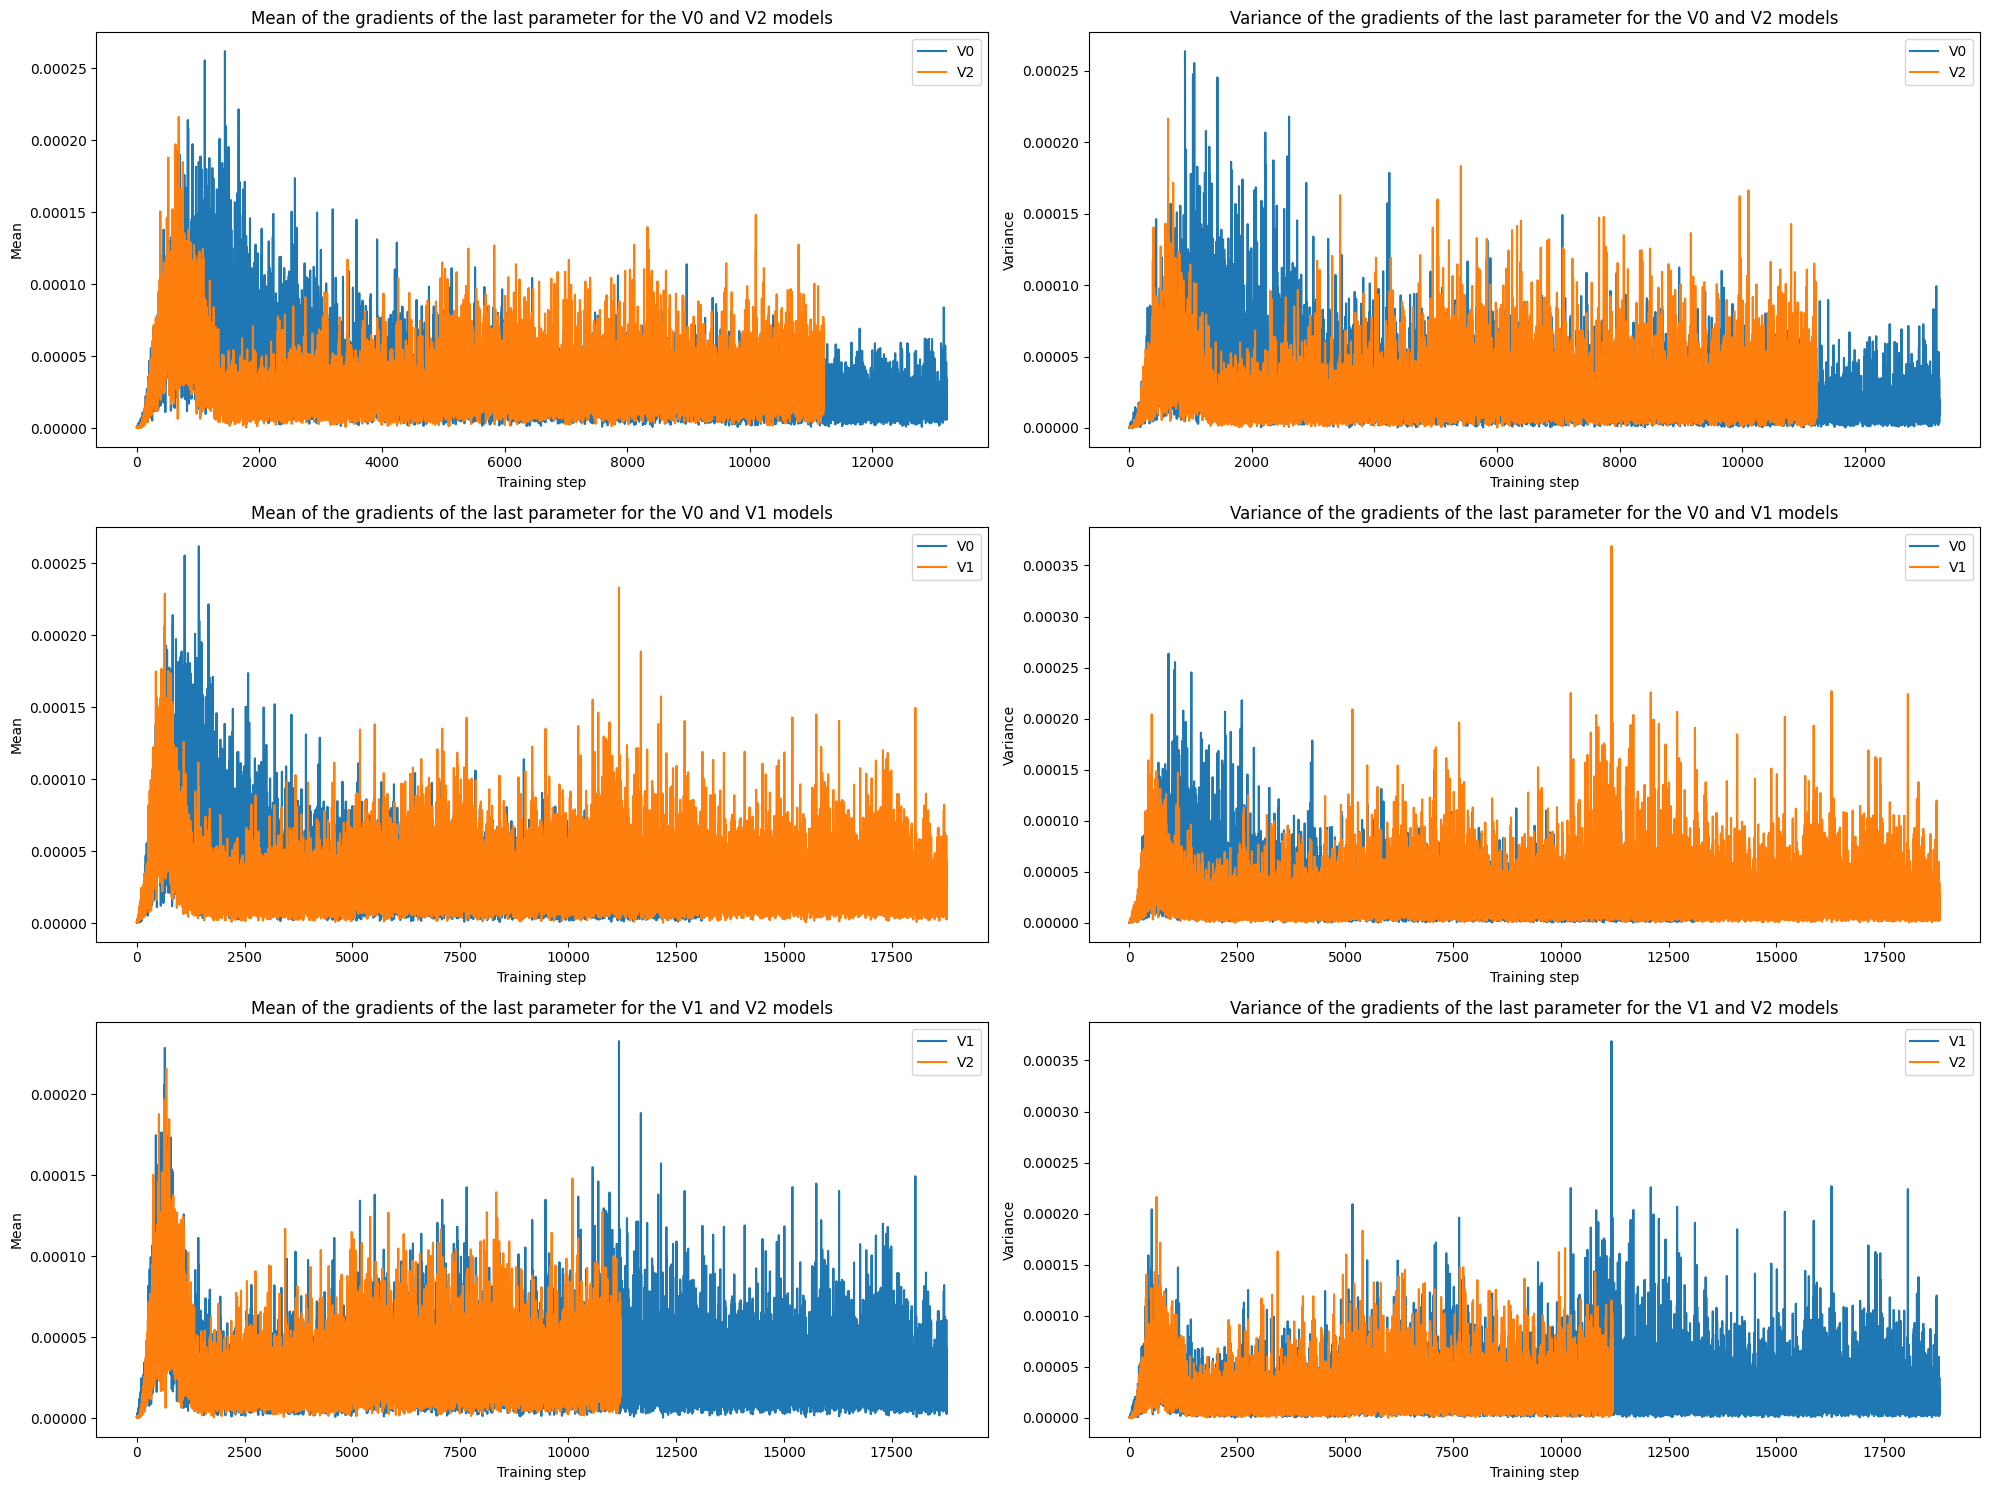

In [21]:
#Now let's plot the mean and variance of the gradients for the V0, V1 and V2 models in the same plot

fig, axs = plt.subplots(3, 2, figsize=(20, 15), tight_layout=True)

axs[0,0].plot(v0_gradients_last_parameter_mean, label = "V0")
axs[0,0].plot(v2_gradients_last_parameter_mean, label = "V2")
axs[0,0].set_title("Mean of the gradients of the last parameter for the V0 and V2 models")
axs[0,0].set_xlabel("Training step")
axs[0,0].set_ylabel("Mean")
axs[0,0].legend()

axs[0,1].plot(v0_gradients_last_parameter_std, label = "V0")
axs[0,1].plot(v2_gradients_last_parameter_std, label = "V2")
axs[0,1].set_title("Variance of the gradients of the last parameter for the V0 and V2 models")
axs[0,1].set_xlabel("Training step")
axs[0,1].set_ylabel("Variance")
axs[0,1].legend()

axs[1,0].plot(v0_gradients_last_parameter_mean, label = "V0")
axs[1,0].plot(v1_gradients_last_parameter_mean, label = "V1")
axs[1,0].set_title("Mean of the gradients of the last parameter for the V0 and V1 models")
axs[1,0].set_xlabel("Training step")
axs[1,0].set_ylabel("Mean")
axs[1,0].legend()

axs[1,1].plot(v0_gradients_last_parameter_std, label = "V0")
axs[1,1].plot(v1_gradients_last_parameter_std, label = "V1")
axs[1,1].set_title("Variance of the gradients of the last parameter for the V0 and V1 models")
axs[1,1].set_xlabel("Training step")
axs[1,1].set_ylabel("Variance")
axs[1,1].legend()

axs[2,0].plot(v1_gradients_last_parameter_mean, label = "V1")
axs[2,0].plot(v2_gradients_last_parameter_mean, label = "V2")
axs[2,0].set_title("Mean of the gradients of the last parameter for the V1 and V2 models")
axs[2,0].set_xlabel("Training step")
axs[2,0].set_ylabel("Mean")
axs[2,0].legend()

axs[2,1].plot(v1_gradients_last_parameter_std, label = "V1")
axs[2,1].plot(v2_gradients_last_parameter_std, label = "V2")
axs[2,1].set_title("Variance of the gradients of the last parameter for the V1 and V2 models")
axs[2,1].set_xlabel("Training step")
axs[2,1].set_ylabel("Variance")
axs[2,1].legend()

plt.show()



## 1.5) Analysis of the mean and variance of all parametrized rotations for all models

In [22]:
v0_gradients_all_parameters = []
v1_gradients_all_parameters = []
v2_gradients_all_parameters = []
aux = []

for i in range(4):
    for j in range(len(v0_gradients[i])):
        aux.append(abs(v0_gradients[i][j][0][0]))
    v0_gradients_all_parameters.append(aux)
    aux = []

for i in range(4):
    for j in range(len(v1_gradients[i])):
        aux.append(abs(v1_gradients[i][j][0][0]))
    v1_gradients_all_parameters.append(aux)
    aux = []

for i in range(4):
    for j in range(len(v2_gradients[i])):
        aux.append(abs(v2_gradients[i][j][0][0]))
    v2_gradients_all_parameters.append(aux)
    aux = []

# Now we have a list for each model, that contains 4 lists each, and each one of these lists has the gradients
# of all the parameters at every timestep.



In [23]:
# Now let's take each list and calculate the mean andthe variance of the gradients at every training step

v0_gradients_all_parameter_counts = [len(v0_gradients_all_parameters[i]) for i in range(4)]
v0_gradients_all_parameter_min = min(v0_gradients_all_parameter_counts)

v0_gradients_all_parameter_mean = []
v0_gradients_all_parameter_std = []
aux_mean = []

for i in range(v0_gradients_all_parameter_min):
    for j in range(4):
        aux_mean.append(v0_gradients_all_parameters[j][i])
    v0_gradients_all_parameter_mean.append(np.mean(aux_mean))
    v0_gradients_all_parameter_std.append(np.std(aux_mean))
    aux_mean = []

v2_gradients_all_parameter_counts = [len(v2_gradients_all_parameters[i]) for i in range(4)]
v2_gradients_all_parameter_min = min(v2_gradients_all_parameter_counts)

v2_gradients_all_parameter_mean = []
v2_gradients_all_parameter_std = []
aux_mean = []

for i in range(v2_gradients_all_parameter_min):
    for j in range(4):
        aux_mean.append(v2_gradients_all_parameters[j][i])
    v2_gradients_all_parameter_mean.append(np.mean(aux_mean))
    v2_gradients_all_parameter_std.append(np.std(aux_mean))
    aux_mean = []

v1_gradients_all_parameter_counts = [len(v1_gradients_all_parameters[i]) for i in range(4)]
v1_gradients_all_parameter_min = min(v1_gradients_all_parameter_counts)

v1_gradients_all_parameter_mean = []
v1_gradients_all_parameter_std = []
aux_mean = []

for i in range(v1_gradients_all_parameter_min):
    for j in range(4):
        aux_mean.append(v1_gradients_all_parameters[j][i])
    v1_gradients_all_parameter_mean.append(np.mean(aux_mean))
    v1_gradients_all_parameter_std.append(np.std(aux_mean))
    aux_mean = []
    


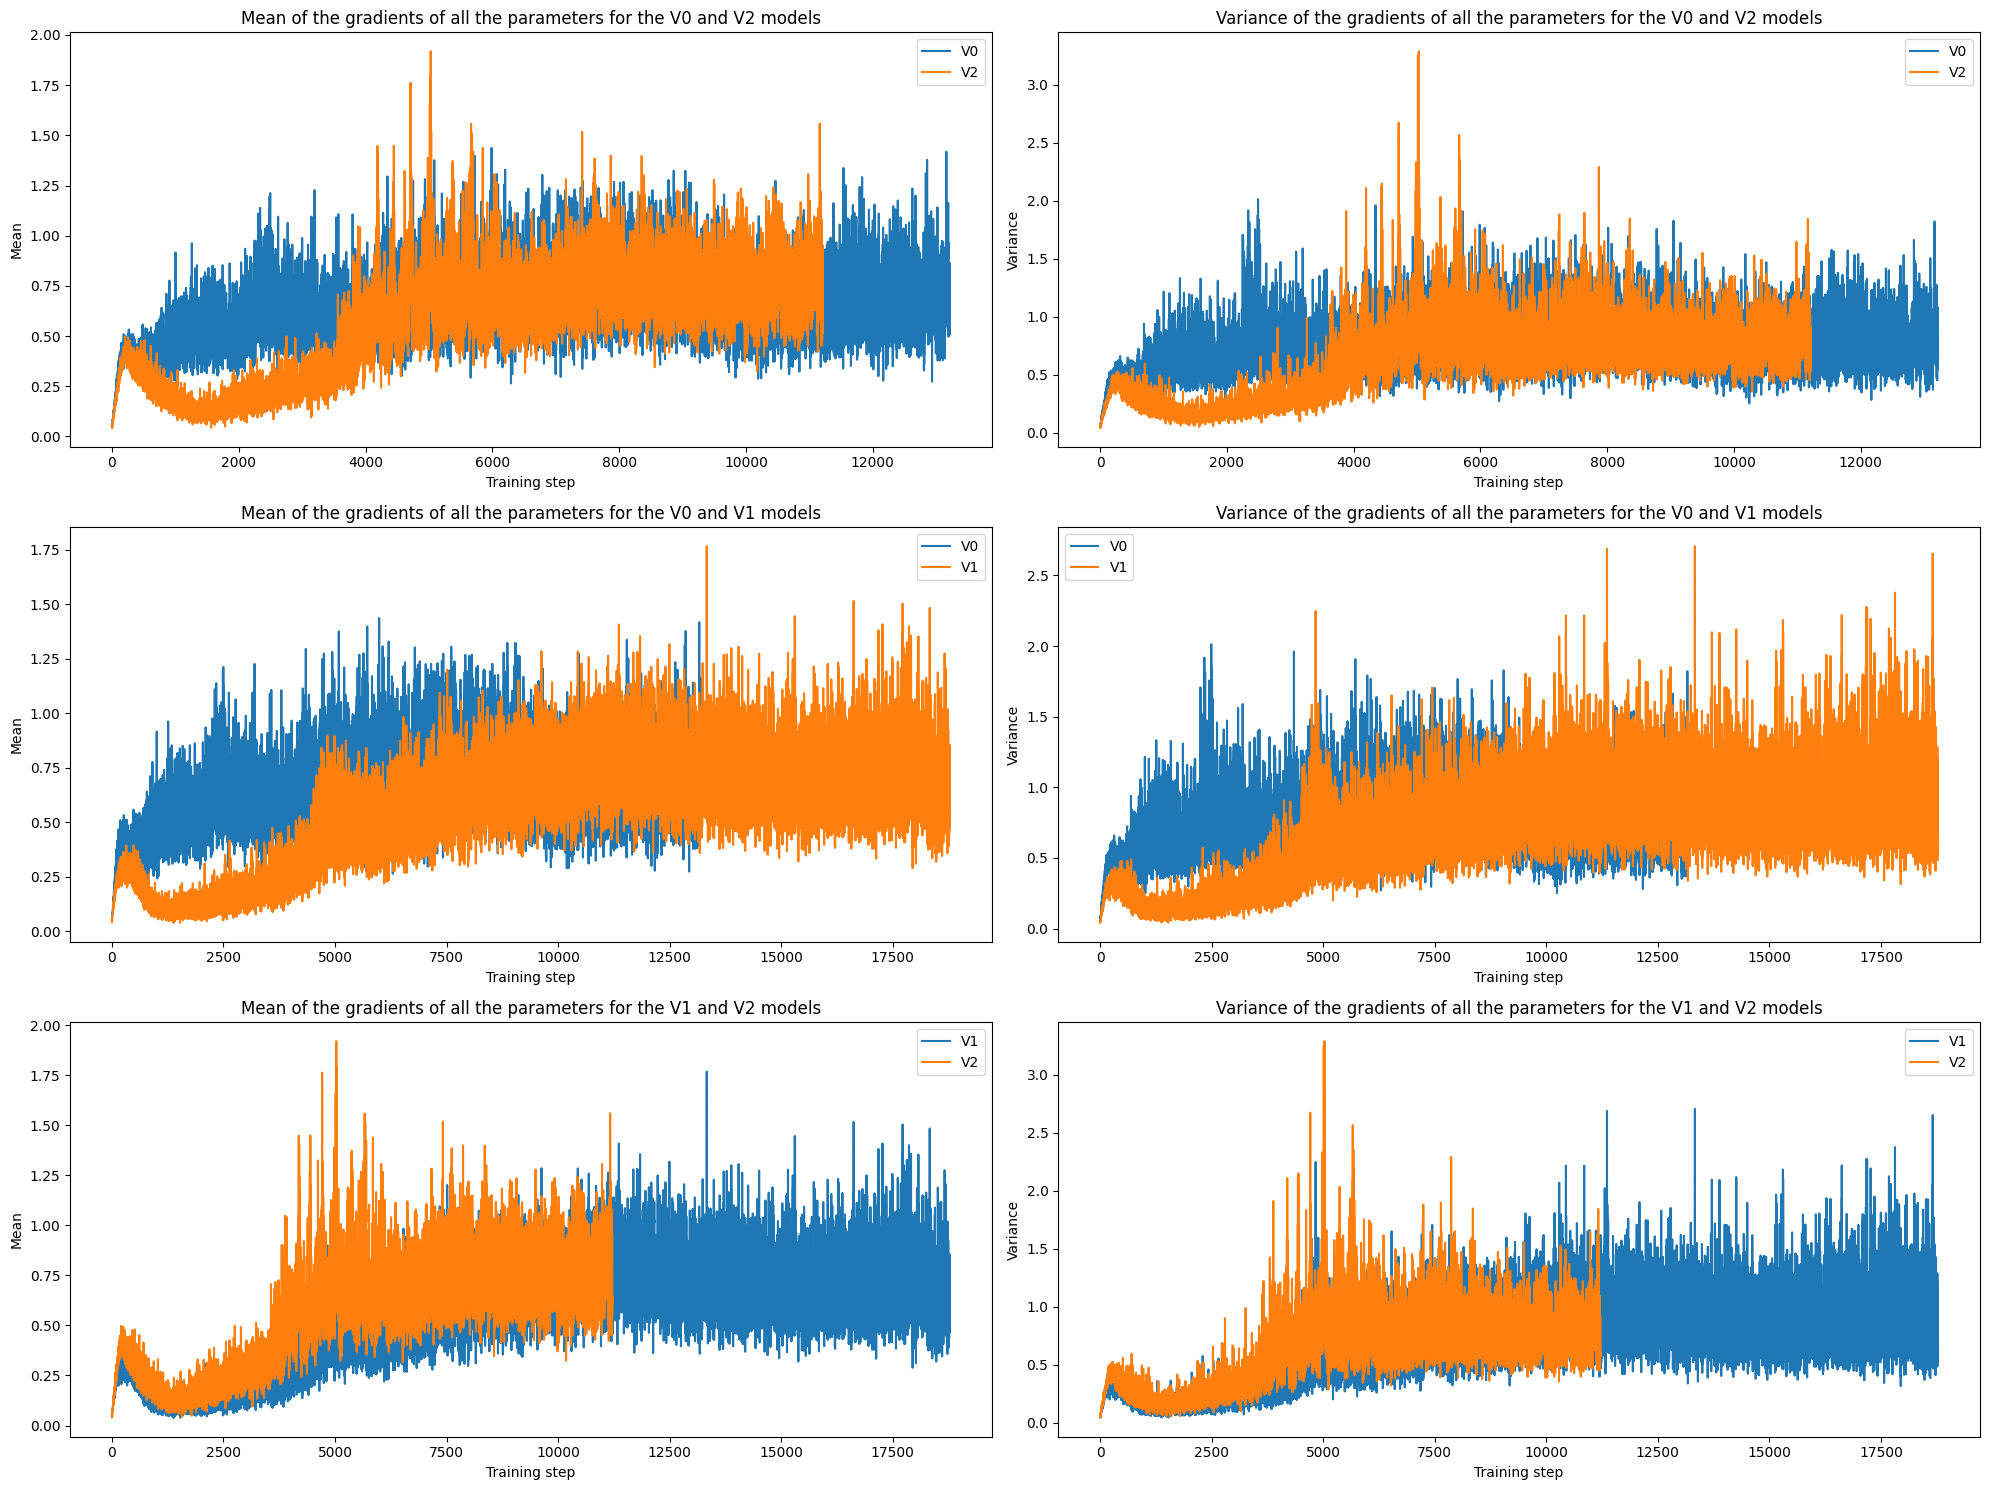

In [24]:
#Now let's plot the mean and variance of the gradients for the V0, V1 and V2 models in the same plot

fig, axs = plt.subplots(3, 2, figsize=(20, 15), tight_layout=True)

axs[0,0].plot(v0_gradients_all_parameter_mean, label = "V0")
axs[0,0].plot(v2_gradients_all_parameter_mean, label = "V2")
axs[0,0].set_title("Mean of the gradients of all the parameters for the V0 and V2 models")
axs[0,0].set_xlabel("Training step")
axs[0,0].set_ylabel("Mean")
axs[0,0].legend()

axs[0,1].plot(v0_gradients_all_parameter_std, label = "V0")
axs[0,1].plot(v2_gradients_all_parameter_std, label = "V2")
axs[0,1].set_title("Variance of the gradients of all the parameters for the V0 and V2 models")
axs[0,1].set_xlabel("Training step")
axs[0,1].set_ylabel("Variance")
axs[0,1].legend()

axs[1,0].plot(v0_gradients_all_parameter_mean, label = "V0")
axs[1,0].plot(v1_gradients_all_parameter_mean, label = "V1")
axs[1,0].set_title("Mean of the gradients of all the parameters for the V0 and V1 models")
axs[1,0].set_xlabel("Training step")
axs[1,0].set_ylabel("Mean")
axs[1,0].legend()

axs[1,1].plot(v0_gradients_all_parameter_std, label = "V0")
axs[1,1].plot(v1_gradients_all_parameter_std, label = "V1")
axs[1,1].set_title("Variance of the gradients of all the parameters for the V0 and V1 models")
axs[1,1].set_xlabel("Training step")
axs[1,1].set_ylabel("Variance")
axs[1,1].legend()

axs[2,0].plot(v1_gradients_all_parameter_mean, label = "V1")
axs[2,0].plot(v2_gradients_all_parameter_mean, label = "V2")
axs[2,0].set_title("Mean of the gradients of all the parameters for the V1 and V2 models")
axs[2,0].set_xlabel("Training step")
axs[2,0].set_ylabel("Mean")
axs[2,0].legend()

axs[2,1].plot(v1_gradients_all_parameter_std, label = "V1")
axs[2,1].plot(v2_gradients_all_parameter_std, label = "V2")
axs[2,1].set_title("Variance of the gradients of all the parameters for the V1 and V2 models")
axs[2,1].set_xlabel("Training step")
axs[2,1].set_ylabel("Variance")
axs[2,1].legend()

plt.show()



This analysis is very interesting, because it shows that the mean and the variance of all the gradients of the data re-uploading models are much closer to zero and lower, respectively, than those of the non data re-uploading models, indicating that these could be in a barren plateau and are definitely harder to train. Why could the difference be so big between simply one parameter and all of them?

These results were obtained without using any type of data encoding. Next, we wanto to check

## 1.6) Analysis of the final weights of each model

In [25]:
#Let's look at the final weights for the models

v0_final_weights = [v0_skolik_optimal_hyper[i]["weights"] for i in range(4)]
v1_final_weights = [v1_skolik_optimal_hyper[i]["weights"] for i in range(4)]
v2_final_weights = [v2_skolik_optimal_hyper[i]["weights"] for i in range(4)]

In [26]:
v0_final_weights[0][2][0][1]

1357.7565

In [27]:
output_weights_v0 = [[v0_final_weights[i][2][0][0], v0_final_weights[i][2][0][1]] for i in range(4)]
output_weights_v1= [[v1_final_weights[i][2][0][0], v1_final_weights[i][2][0][1]] for i in range(4)]
output_weights_v2 = [[v2_final_weights[i][2][0][0], v2_final_weights[i][2][0][1]] for i in range(4)]

In [28]:
print(f"The mean of the weights for the V0 model is {np.mean(output_weights_v0, axis = 0)} and the variance is {np.std(output_weights_v0, axis = 0)}")
print(f"The mean of the weights for the V1 model is {np.mean(output_weights_v1, axis = 0)} and the variance is {np.std(output_weights_v1, axis = 0)}")
print(f"The mean of the weights for the V2 model is {np.mean(output_weights_v2, axis = 0)} and the variance is {np.std(output_weights_v2, axis = 0)}")

The mean of the weights for the V0 model is [721.7646  719.75037] and the variance is [584.8955 587.0397]
The mean of the weights for the V1 model is [145.263   144.72556] and the variance is [38.023617 31.158092]
The mean of the weights for the V2 model is [131.10135 131.92336] and the variance is [6.38603   4.0885715]


Apparently, the models that don't converge keep increasing their output weights, that is why the mean for the output weights of the V0 models is so high, the two models that couldn't converge ended up achieving a value of over a thousand, while all other models achieved a value around 130, which is a more reasonable value according to theory, since the CartPolev0 returns are between 0 and 200.

In [29]:
output_weights_v1

[[132.55151, 135.40157],
 [210.38826, 197.93327],
 [117.225945, 123.88325],
 [120.8863, 121.684135]]

The second agent for the V1 models was also the one that couldn't converge and also ended up with the highest values. I think this must be due to the learning rate of the output weights being 100 times larger than the learning rate of the other parameters.

# 2 - Comparison between Skolik Outscale and Normal Outscale

Specifications:

Above, we compared the different Data Reuploading models with optimal hyperparameters using skolik's outscale, which means that the expectation values were normalized to be between 0 and 1 before being multiplied by a classical weight. Now, we will once again train 4 agents but using the normal outscale, which means that we let the expectation values be between -1 and 1 for each of the data reuploading techniques.

In [67]:
# Let's start by loading the data

#Load the data from the pickle files with skolik outscale

v0_skolik_outscale= []
v1_skolik_outscale = []
v2_skolik_outscale = []


#Load the data corresponding to the V2 models
for i in range(1,5):
    with(open(f"Results/CartPolev0_Skolik_optimal_hyper_skolik_outscaling/CartPolev0_Skolik_Arch_V2_ls_optimal_hyper_{i}.pkl", "rb")) as f:
        v2_skolik_outscale.append(pickle.load(f))

#Load the data corresponding to the V0 models
for i in range(1,5):
    with(open(f"Results/CartPolev0_Skolik_optimal_hyper_skolik_outscaling/CartPolev0_Skolik_Arch_V0_ls_optimal_hyper_{i}.pkl", "rb")) as f:
        v0_skolik_outscale.append(pickle.load(f))

#Load the data corresponding to the V1 models
for i in range(1,5):
    with(open(f"Results/CartPolev0_Skolik_optimal_hyper_skolik_outscaling/CartPolev0_Skolik_Arch_v1_ls_optimal_hyper_{i}.pkl", "rb")) as f:
        v1_skolik_outscale.append(pickle.load(f))

v0_normal_outscale= []
v1_normal_outscale = []
v2_normal_outscale = []

for i in range(1,5):
    with(open(f"Results/CartPolev0_skolik_optimal_hyper_normal_outscaling/CartPolev0_skolik_optimal_hyper_normal_outscalingCartPolev0_Skolik_Arch_v2_ls_optimal_hyper_{i}.pkl", "rb")) as f:
        v2_normal_outscale.append(pickle.load(f))

#Load the data corresponding to the V0 models
for i in range(1,5):
    with(open(f"Results/CartPolev0_skolik_optimal_hyper_normal_outscaling/CartPolev0_skolik_optimal_hyper_normal_outscalingCartPolev0_Skolik_Arch_v0_ls_optimal_hyper_{i}.pkl", "rb")) as f:
        v0_normal_outscale.append(pickle.load(f))

#Load the data corresponding to the V1 models
for i in range(1,5):
    with(open(f"Results/CartPolev0_skolik_optimal_hyper_normal_outscaling/CartPolev0_skolik_optimal_hyper_normal_outscalingCartPolev0_Skolik_Arch_v1_ls_optimal_hyper_{i}.pkl", "rb")) as f:
        v1_normal_outscale.append(pickle.load(f))

## 2.1) Analysis of the performance of each model in the environment using a moving average

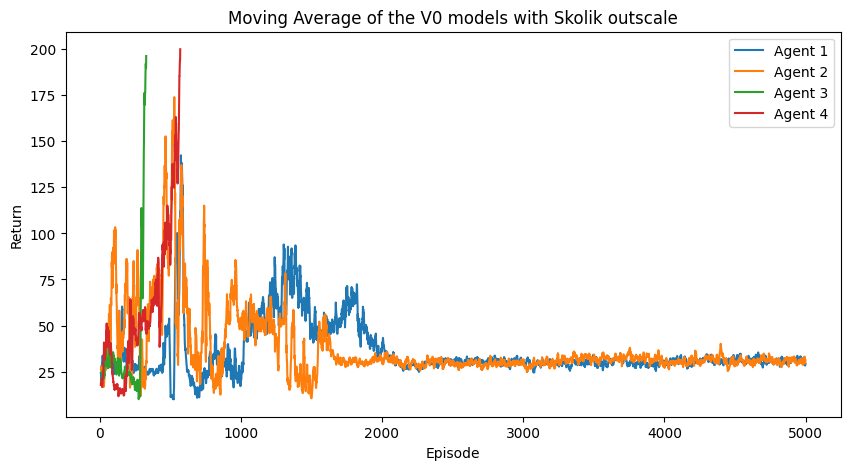

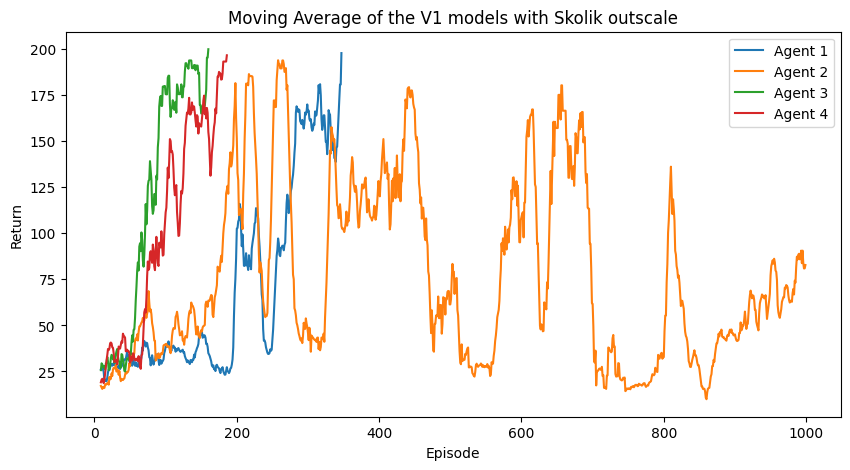

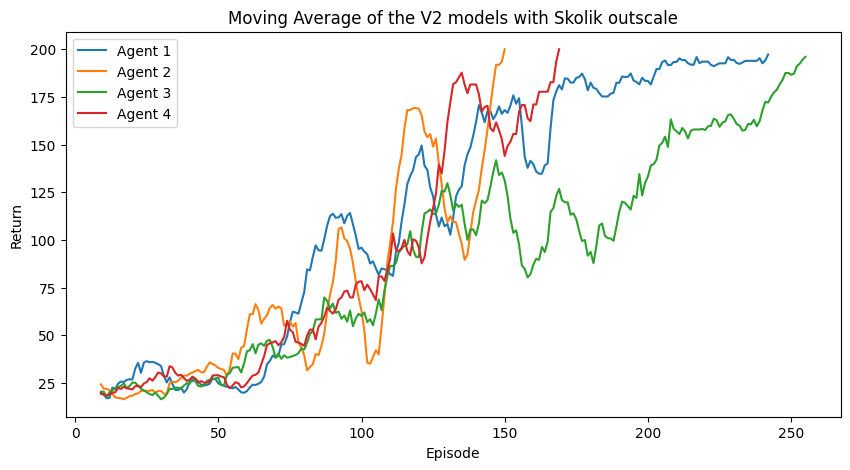

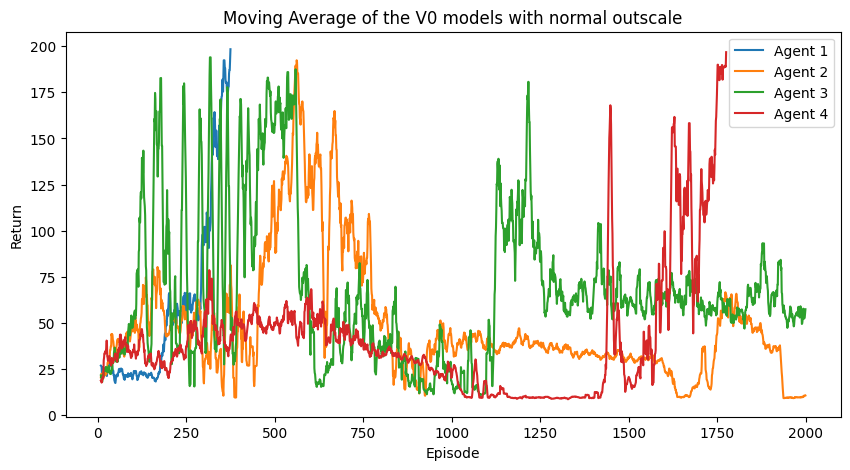

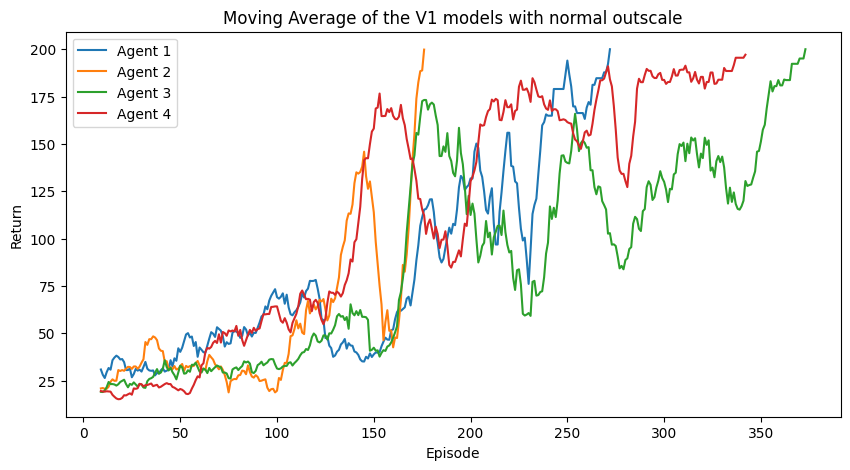

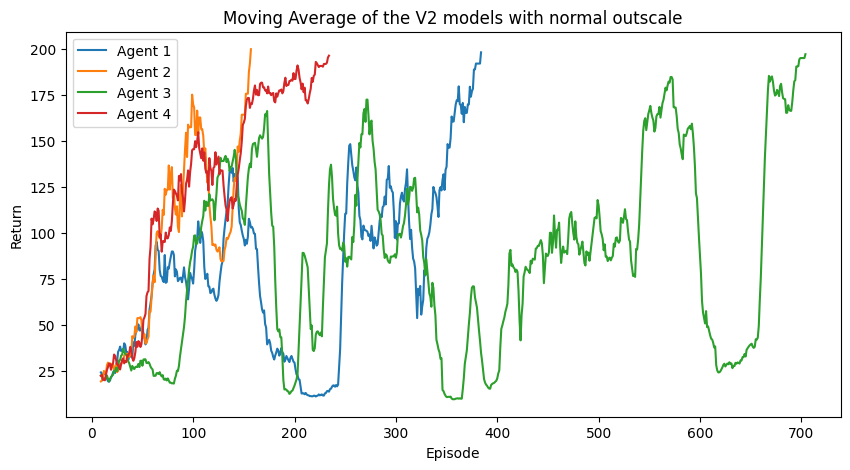

In [69]:
#Plot the moving average of the rewards for each agent
plt.figure(figsize=(10, 5))
plt.title("Moving Average of the V0 models with Skolik outscale")
plt.xlabel("Episode")
plt.ylabel("Return")

for i in range(4):
    plt.plot(pd.Series(v0_skolik_outscale[i]["episode_reward_history"]).rolling(10).mean(), label = f"Agent {i+1}")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Moving Average of the V1 models with Skolik outscale")
plt.xlabel("Episode")
plt.ylabel("Return")

for i in range(4):
    plt.plot(pd.Series(v1_skolik_outscale[i]["episode_reward_history"]).rolling(10).mean(), label = f"Agent {i+1}")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Moving Average of the V2 models with Skolik outscale")
plt.xlabel("Episode")
plt.ylabel("Return")

for i in range(4):
    plt.plot(pd.Series(v2_skolik_outscale[i]["episode_reward_history"]).rolling(10).mean(), label = f"Agent {i+1}")
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.title("Moving Average of the V0 models with normal outscale")
plt.xlabel("Episode")
plt.ylabel("Return")

for i in range(4):
    plt.plot(pd.Series(v0_normal_outscale[i]["episode_reward_history"]).rolling(10).mean(), label = f"Agent {i+1}")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Moving Average of the V1 models with normal outscale")
plt.xlabel("Episode")
plt.ylabel("Return")

for i in range(4):
    plt.plot(pd.Series(v1_normal_outscale[i]["episode_reward_history"]).rolling(10).mean(), label = f"Agent {i+1}")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Moving Average of the V2 models with normal outscale")
plt.xlabel("Episode")
plt.ylabel("Return")

for i in range(4):
    plt.plot(pd.Series(v2_normal_outscale[i]["episode_reward_history"]).rolling(10).mean(), label = f"Agent {i+1}")
plt.legend()
plt.show()


Interestingly, it seems like the Skolik outscale actually yields a better performance than the normal outscale, even though theory would make it seem like it should be the other way around. This could be due to the fact that in CartPolev0, the return is always between 0 and 200, so it might be better to first normalize the expectation values to be between 0 and 1 so that when multiplied by the output weights they could be between 0 and 200. Consequently, in future analysis, we will use the Skolik Outscale.

In [7]:
import sys

sys.path.append("..")

In [8]:
from vqc.vqc_circuit import VQCCIRCUIT

In [9]:
num_qubits = 4
num_layers = 2
circuit_arch = "skolik"
data_reuploading = "schuld"
measurement = "ZZ"

In [10]:
vqc = VQCCIRCUIT(num_qubits, num_layers, circuit_arch, data_reuploading, measurement)

In [11]:
vqc.circuit

(0, 0): ───Ry(theta0)───Rz(theta1)───@───────────@───Rx(x0_0)───Ry(theta8)────Rz(theta9)────@───────────@───Rx(x1_0)───Ry(theta16)───Rz(theta17)───
                                     │           │                                          │           │
(0, 1): ───Ry(theta2)───Rz(theta3)───@───@───────┼───Rx(x0_1)───Ry(theta10)───Rz(theta11)───@───@───────┼───Rx(x1_1)───Ry(theta18)───Rz(theta19)───
                                         │       │                                              │       │
(0, 2): ───Ry(theta4)───Rz(theta5)───────@───@───┼───Rx(x0_2)───Ry(theta12)───Rz(theta13)───────@───@───┼───Rx(x1_2)───Ry(theta20)───Rz(theta21)───
                                             │   │                                                  │   │
(0, 3): ───Ry(theta6)───Rz(theta7)───────────@───@───Rx(x0_3)───Ry(theta14)───Rz(theta15)───────────@───@───Rx(x1_3)───Ry(theta22)───Rz(theta23)───

In [38]:
print(len(vqc.parameters))
print(len(vqc.inputs))

48
20


In [6]:
import tensorflow as tf

In [16]:
w = tf.constant([1,2,3,4,5,6,7,8], shape = (2,4))

In [17]:
s = tf.constant([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], shape = (3,8))

In [18]:
print("w:\n",w)
print("s:\n",s)

w:
 tf.Tensor(
[[1 2 3 4]
 [5 6 7 8]], shape=(2, 4), dtype=int32)
s:
 tf.Tensor(
[[ 1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16]
 [17 18 19 20 21 22 23 24]], shape=(3, 8), dtype=int32)


In [20]:
w = tf.tile(w, multiples = [2,1])

In [22]:
w = tf.transpose(w)

In [23]:
w

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[1, 5, 1, 5],
       [2, 6, 2, 6],
       [3, 7, 3, 7],
       [4, 8, 4, 8]], dtype=int32)>

In [32]:
output = tf.matmul(s,w)

In [33]:
output

<tf.Tensor: shape=(3, 8), dtype=int32, numpy=
array([[  1,   4,   9,  16,  25,  36,  49,  64],
       [  9,  20,  33,  48,  65,  84, 105, 128],
       [ 17,  36,  57,  80, 105, 132, 161, 192]], dtype=int32)>

In [36]:
input_symbols_len = 8

In [81]:
weights = tf.constant([1,2,3,4,5,6,7,8], shape = (2,4))

In [82]:
weights

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[1, 2, 3, 4],
       [5, 6, 7, 8]], dtype=int32)>

In [83]:
tiled_up_inputs = tf.constant([5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5], shape = (3,8))

In [84]:
tiled_up_inputs

<tf.Tensor: shape=(3, 8), dtype=int32, numpy=
array([[5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5, 5, 5, 5]], dtype=int32)>

In [79]:
tiled_up_inputs = tf.reshape(tiled_up_inputs, (12,2,))

In [85]:
output = tf.einsum('ij, kj -> ik', weights, tiled_up_inputs)

2023-03-07 19:13:14.122434: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at einsum_op_impl.h:618 : INVALID_ARGUMENT: Expected dimension 4 at axis 1 of the input shaped [3,8] but got dimension 8


InvalidArgumentError: Expected dimension 4 at axis 1 of the input shaped [3,8] but got dimension 8 [Op:Einsum]

In [80]:
tiled_up_inputs

<tf.Tensor: shape=(12, 2), dtype=int32, numpy=
array([[5, 5],
       [5, 5],
       [5, 5],
       [5, 5],
       [5, 5],
       [5, 5],
       [5, 5],
       [5, 5],
       [5, 5],
       [5, 5],
       [5, 5],
       [5, 5]], dtype=int32)>

In [67]:
#weights is a tensor of shape (2,4) and tiled_up_inputs is a tensor of shape (6,4). I want to ouput a tensor of shape
#(6,4) where each element is the product of the corresponding element in weights and tiled_up_inputs

output = tf.multiply(weights, tiled_up_inputs)

InvalidArgumentError: Incompatible shapes: [2,4] vs. [6,4] [Op:Mul]

In [66]:
output = tf.reshape(output, (3,2))

InvalidArgumentError: Input to reshape is a tensor with 12 values, but the requested shape has 6 [Op:Reshape]

In [60]:
output = tf.matmul(tiled_up_inputs, weights)

InvalidArgumentError: Matrix size-incompatible: In[0]: [6,4], In[1]: [2,4] [Op:MatMul]

In [49]:
tiled_up_inputs = tf.tile(tiled_up_inputs, multiples = [1,2])

In [50]:
tiled_up_inputs

<tf.Tensor: shape=(2, 8), dtype=int32, numpy=
array([[5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5, 5, 5, 5]], dtype=int32)>

In [51]:
scaled_inputs = tf.einsum("i,ji->ji", lambdas, tiled_up_inputs)

In [52]:
scaled_inputs

<tf.Tensor: shape=(2, 8), dtype=int32, numpy=
array([[ 5, 10, 15, 20, 25, 30, 35, 40],
       [ 5, 10, 15, 20, 25, 30, 35, 40]], dtype=int32)>

In [37]:
bias = tf.constant([1,2], shape = (2,))

In [35]:
bias = tf.reshape(tf.tile(bias, multiples = [3]), (3,2))

In [36]:
bias

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [1, 2],
       [1, 2]], dtype=int32)>